# **Compression de réseaux de neurones profonds**

## Introduction

Dans leurs quêtes incessante pour dominer le champ de l'intelligence artificielle, les grosses entreprises de l'IA font face à un défi majeur. À chaque nouvelle version de leurs modèles phares, tels que GPT-4 (Open AI), Gemini Ultra (Google), Mistral Medium (Mistral AI)... la complexité s'accroît de manière exponentielle, poussant le nombre de paramètres – ou poids du réseau – vers des sommets astraux. GPT-4, avec ses estimations vertigineuses de près de 175 milliards de paramètres, incarne cette quête de puissance brute. Cependant, cette gigantesque accumulation de connaissances numériques n'est pas sans conséquences. Elle soulève une tempête de défis techniques et économiques, tissant un récit chargé de suspense et de défi.

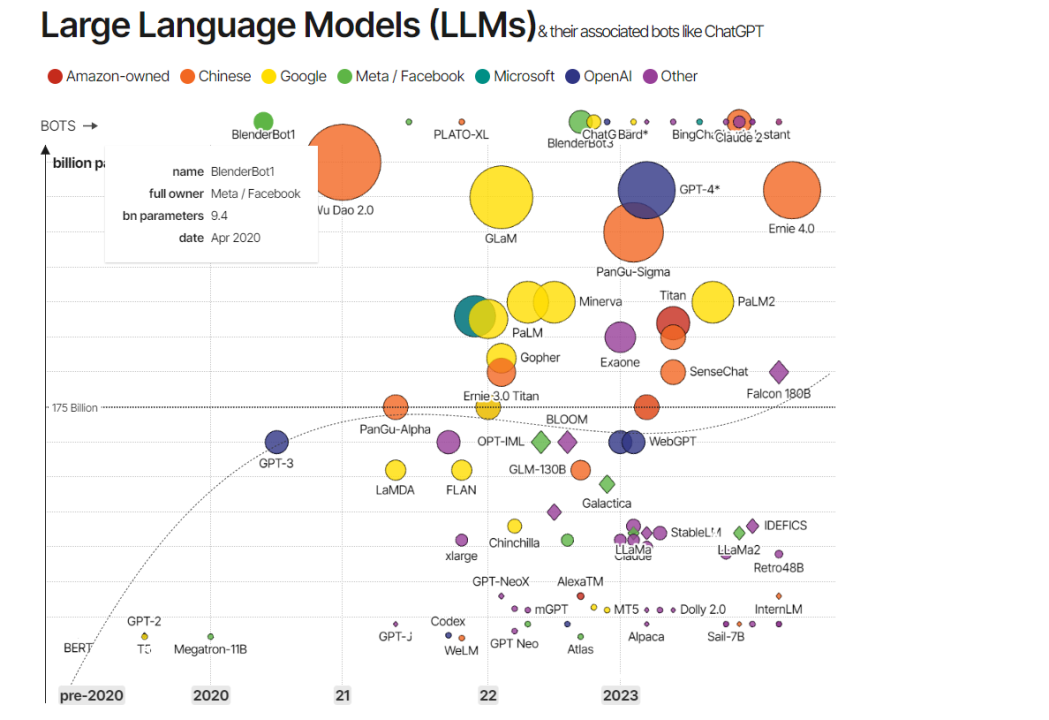




---

### Contrainte énergétique
La taille immense de ces colosses numériques (modèle IA) engloutit la mémoire des GPU ou autre unité de calcul spécialisées, rendant l'inférence – l'acte même d'utiliser le modèle pour générer des réponses – une opération gourmande en ressources. Chaque paramètre supplémentaire exige son dû en espace de stockage et en puissance de calcul, entraînant une consommation d'énergie faramineuse.



### Contrainte matérielle
Avec la montée en puissance des applications mobiles et embarquées, la nécessité de modèles compacts devient cruciale. Pour l'inférence, les modèles sont souvent chargés dans un type de mémoire spécifique, proche des unités de calcul, pour minimiser la latence et maximiser la vitesse de traitement. Cette mémoire, typiquement de la SRAM ou de la DRAM sur des dispositifs embarqués, offre une vitesse d'accès bien supérieure à celle des mémoires de stockage traditionnelles, mais à un coût plus élevé et avec une capacité nettement limitée. Par exemple, tandis qu'un modèle comme GPT-4 peut nécessiter des centaines de gigaoctets de stockage, la capacité de la SRAM disponible sur un dispositif embarqué peut se limiter à quelques mégaoctets ou gigaoctets seulement. Cette contrainte matérielle ne se limite pas aux appareils embarqués; elle s'étend également au cloud, où le coût des infrastructures capables de gérer de telles mémoires à haute performance devient un enjeu économique majeur. Les fournisseurs de cloud doivent équilibrer la capacité et la vitesse de ces mémoires spécialisées face à la demande croissante pour des inférences rapides et efficaces, tout en gérant les coûts associés.

### Contrainte en vitesse d'inférence.
Aussi, prenons l'exemple des voitures autonomes de Tesla, où la moindre milliseconde de délai peut avoir des conséquences dramatiques. Ces véhicules ne peuvent se permettre une latence élevée dans le traitement des données sensorielles; chaque décision doit être prise avec une rapidité et une précision extrêmes. Or, intégrer des GPU haut de gamme comme les Nvidia A100 – dont le prix peut avoisiner les 10 000 dollars et dont les dimensions et la consommation énergétique ne sont pas négligeables – sous les sièges des passagers n'est pas une option viable. Outre les contraintes physiques et économiques, cela poserait des défis considérables en termes de gestion thermique et d'alimentation électrique : contrainte de vitesse d'inférence.


### Contrainte de stockage en dur
Enfin le simple fait de réduire l'espace mémoire de nos modèle, permets de les ditribuer plus facilement, Seriez vous pret à télécharger la mise à jour de votre dernier modèle d'IA si à chaque inovation du modèle, vous auriez plusieurs dizaines de giga de téléchargement ? Peut être n'auriez vous même pas l'espace disponible sur votre espace disque ou la bande passante dans votre
maison de campagne entrainerait un téléchargement de plusieurs semaines ?



---

### La compression de modèles

Face à ces défis colossaux, les ingénieurs et chercheurs en intelligence artificielle ont dû faire preuve d'ingéniosité et d'innovation pour trouver des solutions viables. Au cœur de cette quête se trouve un ensemble de techniques de compression avancées, conçues pour alléger le fardeau imposé par les modèles d'IA de grande envergure. Ces méthodes offrent une lueur d'espoir, un chemin vers une utilisation plus efficiente et pratique de l'intelligence artificielle, sans compromettre la performance ou l'exactitude des modèles. Voici un aperçu des principales techniques de compression qui se sont avérées cruciales dans cette entreprise.

**Élagage (Pruning):** Cette technique consiste à identifier et à supprimer les connexions neuronales les moins importantes dans un réseau. En éliminant ces poids superflus, qui ont peu ou pas d'impact sur la sortie du modèle, il est possible de réduire significativement la taille du modèle sans altérer sa capacité de prédiction. L'élagage se fait souvent de manière itérative, en évaluant régulièrement l'importance des connexions et en ajustant le réseau en conséquence, aboutissant à une structure optimisée et compacte.

**Quantification:** La quantification réduit le nombre de bits requis pour représenter chaque poids dans le réseau, passant typiquement de représentations en virgule flottante de 32 bits à des formats plus compacts de 8 bits ou même moins. Cette réduction drastique du nombre de bits par poids diminue la taille globale du modèle et accélère les opérations de calcul, car les processeurs peuvent gérer des données plus petites plus rapidement. De plus, la quantification peut souvent être effectuée sans perte significative de précision. Nous étudierons une technique de quantification très agressive par partage de poids avec réentrainement.

**Codage de Huffman:** S'appuyant sur les principes de la théorie de l'information, le codage de Huffman est une méthode de compression sans perte qui attribue des codes de longueurs variables aux poids du réseau, en fonction de leur fréquence d'occurrence. Les poids les plus fréquents reçoivent les codes les plus courts, tandis que les moins fréquents sont assignés à des codes plus longs. Cette approche réduit la taille du modèle en exploitant les inégalités dans la distribution des poids, aboutissant à une représentation plus efficace en termes d'espace.

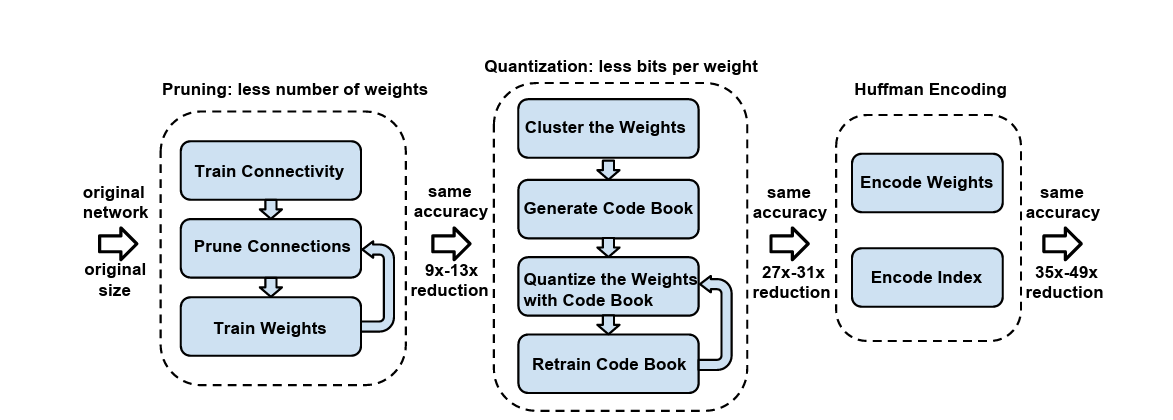

**`Figure 1: Les trois étapes de compression de réseaux de neurone: Elagage, Quantification par partage de poids et encodage Huffman.`**

Ces techniques de compression, utilisées seules ou en combinaison, représentent une avancée significative dans la résolution des contraintes matérielles, énergétiques et de vitesse d'inférence associées aux modèles d'IA de grande taille. Elles permettent non seulement de déployer ces modèles sur des dispositifs avec des ressources limitées, comme les appareils mobiles et les véhicules autonomes, mais aussi d'améliorer l'efficacité énergétique et de réduire les coûts opérationnels dans les centres de données. En fin de compte, ces méthodes de compression ouvrent la voie à une ère où l'intelligence artificielle peut être intégrée de manière plus durable et accessible dans notre quotidien, rendant la technologie non seulement plus puissante, mais aussi plus pratique et équitable pour tous.

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR
import torch.nn.utils.prune as prune
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm
from copy import deepcopy
import os
from sklearn.cluster import KMeans
import heapq
import struct
import math
import shutil

Note: Un choix a été fait dans ce notebook de tester différentes stratégies avec beaucoup de réentraînement. Les cellules étant déjà jouées, seulement les parties X.0, X.1 et entrainement du meilleur modèles sont obligatoires. De plus de checkpoints permmetent de loader les meilleurs modèles à chaque étape ;) Bonne lecture !

## MNIST (Dataset)

Pour démontrer l'efficacité de ces différentes techniques, nous nous appuierons sur MNIST.

Le dataset MNIST (Mixed National Institute of Standards and Technology) est l'un des ensembles de données les plus iconiques et historiquement significatifs dans le domaine de l'apprentissage automatique et de la vision par ordinateur. Composé de 70 000 images en noir et blanc, réparties en un ensemble d'entraînement de 60 000 images et un ensemble de test de 10 000 images, MNIST sert de point de départ pour de nombreux projets d'apprentissage profond.

Chaque image de MNIST est normalisée pour tenir dans un carré de 28x28 pixels et représente un chiffre manuscrit unique, allant de 0 à 9. L'objectif associé à cet ensemble de données est de construire un modèle capable de reconnaître et de classer correctement ces chiffres, une tâche qui peut sembler simple à première vue mais qui a joué un rôle crucial dans le développement et l'évaluation de modèles de réseaux de neurones profonds.

In [3]:
BATCH_SIZE = 64

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

100%|██████████| 9912422/9912422 [00:00<00:00, 90326410.59it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 33903076.92it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21215952.70it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3387965.28it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Utilisation du périphérique:", device)

Utilisation du périphérique: cpu


In [5]:
def display_dataset(dataset, net=None, only_incorrect=False):
    X_size, Y_size = 2, 15
    fig, ax = plt.subplots(X_size, Y_size, figsize=(17, 2.5))
    ax = ax.flatten()
    if only_incorrect:
      idx_list = np.arange(0, len(dataset))
    else:
      idx_list = np.random.choice(range(len(dataset)), size=X_size * Y_size, replace=False)
    displayed = 0

    for idx in idx_list:
        if displayed >= X_size * Y_size:
            break

        image, label = dataset[idx]
        image_orig = image * torch.tensor([0.5, 0.5, 0.5])[:, None, None] + torch.tensor([0.5, 0.5, 0.5])[:, None, None]
        image_orig = np.transpose(image_orig.numpy(), (1, 2, 0))

        if net is not None:

            with torch.no_grad():
                outputs = net(image.to(device).unsqueeze(0))
                _, predicted = torch.max(outputs, 1)
                predicted_label = predicted.item()

            if only_incorrect and predicted_label == label:
                continue

            color = 1 if predicted_label == label else 0
            image_new = np.zeros((image_orig.shape[0]+2, image_orig.shape[1]+2, image_orig.shape[2]))
            image_new[:, :, color] = 1
            image_new[1:-1,1:-1, :] = image_orig
            ax[displayed].imshow(image_new)
            ax[displayed].set_axis_off()
            ax[displayed].set_title(f'V:{label}-P:{predicted_label}')
            displayed += 1
        else:
            if displayed < X_size * Y_size:
                ax[displayed].imshow(image_orig)
                ax[displayed].set_axis_off()
                ax[displayed].set_title(f'V:{label}')
                displayed += 1

    for i in range(displayed, X_size * Y_size):
        fig.delaxes(ax[i])
    print(f'V=label Vrai, P=label Prédit')


Petit exemple d'un échantillon d'images prélevé de MNIST.

V=label Vrai, P=label Prédit


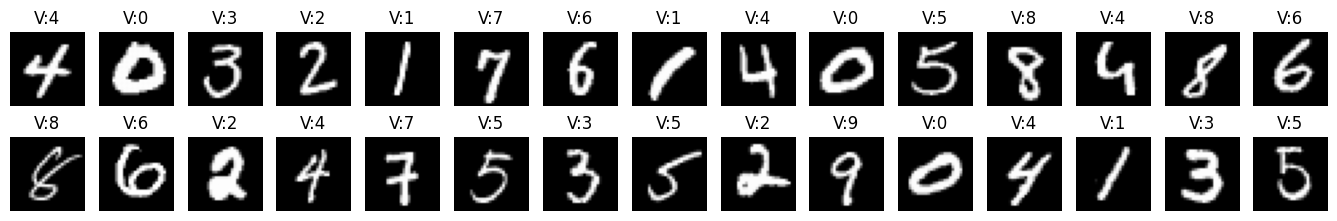

In [6]:
display_dataset(trainset)

## LeNet (Modèle)

LeNet, pionnier des réseaux de neurones convolutifs conçu par Yann LeCun, est devenu un modèle de référence pour la reconnaissance d'images. Sa structure, combinant des couches de convolution et de pooling suivies de couches entièrement connectées, est particulièrement adaptée au traitement rapide et efficace d'images, comme celles du dataset MNIST. Dans notre projet, l'emploi de LeNet s'aligne avec notre objectif de maintenir des temps d'inférence et de réentrainement courts, illustrant parfaitement l'équilibre entre simplicité, performance et efficacité.

In [7]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## 1. Test et entrainement du modèle

Dans un premier temps, nous nous concentrons sur un **entraînement standart** du modèle, **sans compression**.

**`Sommaire de la partie`**:
- **1.0** Implémentation du Pytorch.
- **1.1** Entraînement du réseau.
- **1.2** Bilan sur l'entraînement standart.

### 1.0 Implémentation pytorch

In [8]:
def test(net, dataloader):
  criterion = nn.CrossEntropyLoss()
  correct = 0
  total = 0
  loss = 0
  with torch.no_grad():
      for data in dataloader:
          images, labels = data[0].to(device), data[1].to(device)
          outputs = net(images)
          loss += criterion(outputs, labels).item()
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  accuracy = 100 * correct / total
  average_loss = loss / len(dataloader)

  print(f'Sur {len(dataloader.dataset)} images de test: Précision = {accuracy:.3f}%, Perte moyenne par image = {average_loss:.3f}')
  return accuracy, average_loss


In [9]:
def train(net, optimizer, n_epoch, scheduler=None):
  criterion = nn.CrossEntropyLoss()
  net.train()
  display_step = 4
  num_batches = len(trainloader)
  display_interval = max(num_batches // display_step, 1)
  for epoch in range(n_epoch):
    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader), total=len(trainloader))
    pbar.set_description(f"[Époque {epoch + 1}/{n_epoch}] lr={optimizer.param_groups[0]['lr']:.4f}")
    for i, data in pbar:
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (i + 1) % display_interval == 0 or (i + 1) == num_batches:
          pbar.set_postfix(loss=(running_loss / (i + 1)))
    if scheduler is not None:
      scheduler.step()
    accuracy_train, loss_train = test(net, trainloader)
    accuracy_test, loss_test = test(net, testloader)

  print('Entraînement terminé')
  return accuracy_test, loss_test, accuracy_train, loss_train

In [10]:
def save_model(model, path):
    torch.save(model.state_dict(), path)

### 1.1 Entraînement du réseau

In [27]:
net = LeNet().to(device)
test(net, trainloader)
accuracy_random, loss_random = test(net, testloader)
print(f'Précision d\'un classifieur purement aléatoire : Précision = {1/len(trainset.classes)*100:.3f}%')

Sur 60000 images de test: Précision = 10.743%, Perte moyenne par image = 2.305
Sur 10000 images de test: Précision = 10.710%, Perte moyenne par image = 2.305
Précision d'un classifieur purement aléatoire : Précision = 10.000%


Avant entrainement, nous nous rendons compte de la précision (acccuracy) et de la perte (loss) du modèle. Nous passons ensuite à l'entrainement, nous avons choisit un taux d'apprentissage décroissant (symbolisé par le scheduler). Libre à vous de changer ces paramètres d'apprentissage, afin d'optimiser la performance du réseaux ! 😀

**`Précision et Perte : modèle aléatoire (non entraîné)`**

**- Précision - entrainement** = 10.218% \
**- Précision - test** = 10.100%

**- Perte - entrainement** = 2.305 \
**- Perte - test** = 2.304

In [ ]:
%%time
optimizer = optim.Adam(net.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=3, gamma=0.5)
net_accuracy_test, net_loss_test, net_accuracy_train, net_loss_train = train(net, optimizer, n_epoch=5, scheduler=scheduler)

[Époque 1/5] lr=0.0010: 100%|██████████| 938/938 [00:16<00:00, 58.03it/s, loss=0.263]


Sur 60000 images de test: Précision = 97.522%, Perte moyenne par image = 0.078
Sur 10000 images de test: Précision = 97.750%, Perte moyenne par image = 0.072


[Époque 2/5] lr=0.0010: 100%|██████████| 938/938 [00:14<00:00, 63.02it/s, loss=0.0662]


Sur 60000 images de test: Précision = 98.593%, Perte moyenne par image = 0.044
Sur 10000 images de test: Précision = 98.350%, Perte moyenne par image = 0.046


[Époque 3/5] lr=0.0010: 100%|██████████| 938/938 [00:16<00:00, 56.62it/s, loss=0.0477]


Sur 60000 images de test: Précision = 98.962%, Perte moyenne par image = 0.035
Sur 10000 images de test: Précision = 98.710%, Perte moyenne par image = 0.041


[Époque 4/5] lr=0.0005: 100%|██████████| 938/938 [00:14<00:00, 63.48it/s, loss=0.0301]


Sur 60000 images de test: Précision = 99.348%, Perte moyenne par image = 0.022
Sur 10000 images de test: Précision = 98.910%, Perte moyenne par image = 0.033


[Époque 5/5] lr=0.0005: 100%|██████████| 938/938 [00:15<00:00, 61.38it/s, loss=0.0247]


Sur 60000 images de test: Précision = 99.353%, Perte moyenne par image = 0.020
Sur 10000 images de test: Précision = 98.960%, Perte moyenne par image = 0.033
Entraînement terminé
CPU times: user 2min 27s, sys: 940 ms, total: 2min 28s
Wall time: 2min 31s


V=label Vrai, P=label Prédit


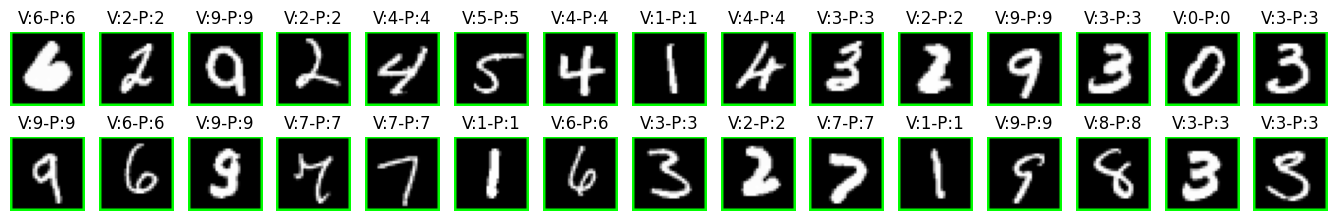

In [ ]:
display_dataset(net=net, dataset=testset, only_incorrect=False)

V=label Vrai, P=label Prédit


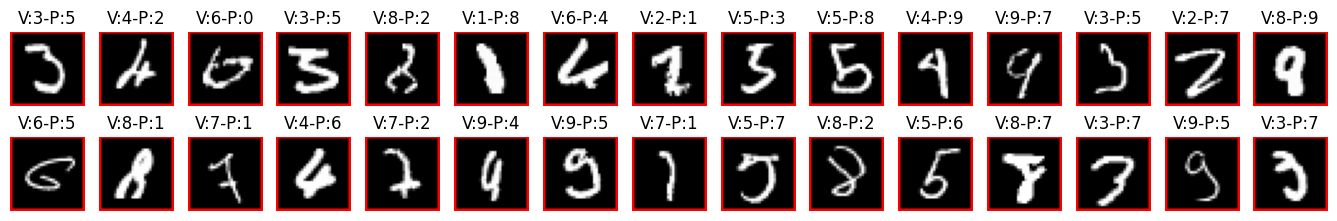

In [ ]:
display_dataset(net=net, dataset=testset, only_incorrect=True)

On obtient un réseau qui avoisine une précison de 98-99% sur les données de test et d'entrainement.

In [ ]:
path = 'LeNetTrained.pth'
save_model(model=net, path=path)

### 1.2 Bilan sur l'entraînement standart

**`Cellule checkpoint:`** Décommenter cette cellule pour accéder au modèle entraîné, si vous n'avez pas eu le temps d'entraîner le modèle final.

In [28]:
# path = 'LeNetTrained.pth'
# state_dict = torch.load(path, map_location=torch.device(device))
# net = LeNet()
# net.load_state_dict(state_dict)
# net.to(device)

# net_accuracy_train, net_loss_train = test(net, trainloader)
# net_accuracy_test, net_loss_test = test(net, testloader)

Sur 60000 images de test: Précision = 99.353%, Perte moyenne par image = 0.020
Sur 10000 images de test: Précision = 98.960%, Perte moyenne par image = 0.033


**🖊🧑 Exercice:** Déterminer la taille nécessaire pour stocker les poids du modèle actuel. \
- On suppose que l'on ne stocke pas la structure du modèle (les dimensions, ordre, types de couches ne sont pas prise en compte dans le calculs - seulement les poids).
- On suppose également que l'on connaît l'encodage (nombre de bits pour lesquel les nombres sont encodés chaque tenseur).


**☝  Solution:**  <details class="alert alert-danger">
    <summary markdown="span"><b>Prêt à voir la solution </b></summary>
    
Les dimensions des tenseurs de poids pour chaque couche sont déjà connus, nous pouvons donc stocker les valeurs des poids en ligne (liste).

Les poids sont encodés sur 32 bits.

```
# Dimensions des poids pour chaque couche

# Poids
# Convolutional layers
conv1_weights = net.conv1.weight.numel() # 1 * 6 * 5 * 5
conv2_weights = net.conv2.weight.numel() # 6 * 16 * 5 * 5
# Fully connected layers
fc1_weights   = net.fc1.weight.numel() # 16 * 4 * 4 * 120
fc2_weights   = net.fc2.weight.numel() # 120 * 84
fc3_weights   = net.fc3.weight.numel() # 84 * 10

# Biais
# Convolutional layers
conv1_bias = net.conv1.bias.numel() # 6
conv2_bias = net.conv2.bias.numel() # 16
# Fully connected layers
fc1_bias   = net.fc1.bias.numel() # 120
fc2_bias   = net.fc2.bias.numel() # 84
fc3_bias   = net.fc3.bias.numel() # 10

# Représentation des poids sur 32 bits
weight_size = net.conv1.weight.element_size() * 8 # 32

# Nombre total de poids et biais
total_weights = conv1_weights + conv2_weights + fc1_weights + fc2_weights + fc3_weights
total_bias = conv1_bias + conv2_bias + fc1_bias + fc2_bias + fc3_bias
total_weights_bias = total_weights + total_bias

# Taille en bits/octets/Mo
total_bits = total_weights_bias * weight_size
total_bytes = total_bits / 8
total_megabytes = total_bytes / (1024 ** 2)

print(f'Taille du modèle initial en bits = {total_bits}') # 1 421 632
print(f'Taille du modèle initial en octets = {total_bytes}') # 177704.0
print(f'Taille du modèle initial en Mega Octets = {total_megabytes}') # 0.16947174072265625
```

On obtient donc un modèle initiale de taille 1 421 632 bits soit 0.177 Mo. La taille n'a rien à voir avec les plus gros modèles de language, cependant toutes les techniques appliquées à ce modèle sont tout aussi valables sur des modèles bien plus conséquents.

</details>

**`Taille, Précision et Perte : modèle initiale entraîné (avant compression)`**

**- Taille** = 1 421 632  bits

**- Précision - entrainement** = 99.352% \
**- Précision - test** = 98.960%

**- Perte - entrainement** = 0.020 \
**- Perte - test** = 0.033


## 2. Elagage (Pruning)

L'élagage de neurones, ou "network pruning", est une technique cruciale pour la compression des modèles de réseaux de neurones convolutifs (CNN), visant à réduire leur complexité sans compromettre l'exactitude des prédictions. Inspiré par les travaux pionniers, notamment ceux de Han et al. (2015), qui ont démontré la possibilité de réduire drastiquement le nombre de paramètres des modèles CNN comme AlexNet et VGG-16 sans perte d'accuracy, cette approche consiste initialement à entraîner le réseau de manière classique pour apprendre la connectivité. Ensuite, elle implique l'élimination des connexions ayant des poids inférieurs à un certain seuil, considérées comme peu importantes pour les performances du modèle. La dernière étape consiste à réentraîner le réseau afin d'optimiser les poids des connexions restantes, maintenant plus éparse.

En PyTorch, cette technique peut être implémentée à l'aide de la bibliothèque `torch.nn.utils.prune`, qui offre diverses méthodes pour appliquer l'élagage à zéro selon un taux spécifique, soit globalement sur tout le réseau, soit couche par couche. Lors du réentrainement, il est essentiel de maintenir les poids élagués à zéro en annulant leurs gradients avant la mise à jour des poids avec la méthode `step`, car PyTorch calcule les gradients pour tous les poids, y compris ceux mis à zéro.

Nous explorerons différentes stratégies d'élagage pour évaluer leur impact sur la performance et la taille du modèle :
- **Élagage global naïf** : Application d'un taux d'élagage uniforme à travers le réseau suivi d'une phase de réentrainement.
- **Différents taux d'élagage global** : Expérimentation avec divers taux d'élagage pour trouver un équilibre optimal entre compression et précision, suivie de réentrainement.
- **Choix des poids à élaguer aléatpoir ou en valeur absolue** : Utilisation de la norme L1 , ou d'une sélection aléatoire pour déterminer les poids à élaguer.
- **Élagage avec un taux différent par couche** : Adaptation du taux d'élagage spécifiquement pour chaque couche en fonction de sa sensibilité et importance.
- **Élagage structuré par couche** : Suppression de structures entières (comme des canaux de convolution) au sein des couches pour simplifier le modèle de manière plus radicale.
- **Élagage global non structuré itératif** : Un processus cyclique où l'élagage est suivi d'une phase de réentrainement, répété plusieurs fois avec un taux d'élagage progressivement accru.

Ces approches nous permettront d'évaluer l'efficacité de l'élagage dans la réduction de la taille du modèle et l'optimisation de ses performances, en cherchant le meilleur compromis entre la complexité du modèle et sa capacité à généraliser à partir des données. \

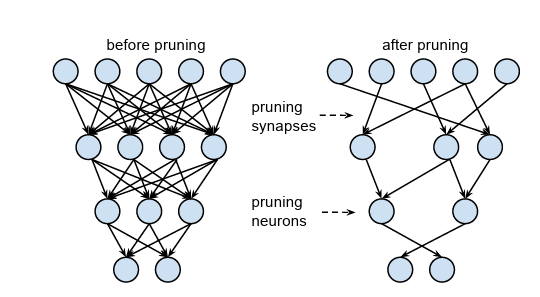

**`Figure 2: Elagage de poids (connexions) dans un réseau.`**

**`Sommaire de la partie`**:
- **2.0** Implémentation du Pytorch.
- **2.1** Elagage global naïf.
- **2.2** Elaguage pour différents taux.
- **2.3** Différentes règles d'élagages.
- **2.4** Elagage couche par couche.
- **2.5** Elagage structuré.
- **2.6** Elagage non structuré itératif.
- **2.7** Application de la meilleur stratégie d'élagage.
- **2.8** Bilan sur l'élagage.


### 2.0 Implémentation pytorch

Pour ce faire nous définissons 2 principales fonctions:
- `prune_network` qui applique un élaguage sur le réseau en entrées avec possibilité de choisir le type d'élaguage le taux global ou par couche...
- `retrain`qui réentraine un réseau élagué en prenant garde à garder les poids élagués nuls.

In [10]:
def prune_network(net, amount=0.9, method=prune.L1Unstructured, dim=-1, n=1):
  """
  amount : amount to prune                            -> float/int or {layer_name:(weight_amount, bias_amount), ...}
  method : method for pruning                         -> object or {layer_name:(weight_method, bias_method), ...}
  dim    : for structured pruning, dimension to prune -> int or {layer_name:weight_dim, ...}
  n      : norm dimension for LnStructured            -> int or {layer_name:weight_n, ...}

  (bias is one dimensionnal so do not apply prune.LnStructured on bias)
  """
  # Fonctionne avec:
  # - prune.L1Unstructured
  # - L2Unstructured
  # - prune.RandomUnstructured
  # - prune.LnStructured

  is_local = isinstance(amount, dict) or isinstance(method, dict)

  # Première stratégie : élagage local
  if is_local:
      # Création d'un dictionnaire si jamais l'argument fournit n'en est pas un
      if not isinstance(amount, dict):
          amount = {name: (amount, amount) for name in method.keys()}
      if not isinstance(method, dict):
          method = {name: (method, method) for name in amount.keys()}
      if not isinstance(dim, dict):
          dim = {name: dim for name in amount.keys()}
      if not isinstance(n, dict):
          n = {name: n for name in amount.keys()}

      for name, module in net.named_modules():
          # Récupération des paramètres d'élagage pour chaque couche
          if name in amount and name in method:
              weight_amount, bias_amount = amount[name]
              weight_method, bias_method = method[name]
              weight_dim = dim[name]
              weight_n   = n[name]

              # Elagage sur les poids
              if 'weight' in module._parameters:
                  if weight_method.PRUNING_TYPE == "structured":
                      weight_method.apply(module, name='weight', amount=weight_amount, dim=weight_dim, n=weight_n)
                  else:
                      weight_method.apply(module, name='weight', amount=weight_amount)
                  prune.remove(module, 'weight')

              # Elagage sur les biais
              if 'bias' in module._parameters and module.bias is not None:
                  if bias_method.PRUNING_TYPE == "structured" and bias_method is not prune.Identity:
                      print(f"WARNING: the method {bias_method} is not suitable for bias (bias tensors are one dimensionnal)!")
                      # do not apply structured prunning method on bias
                  else:
                      bias_method.apply(module, name='bias', amount=bias_amount)
                  prune.remove(module, 'bias')

  # Seconde stratégie : élagage global
  else:
      parameters_to_prune = []
      for name, module in net.named_modules():
          if isinstance(module, torch.nn.Conv2d) or isinstance(module, torch.nn.Linear):
              parameters_to_prune.append((module, 'weight'))
              if module.bias is not None:
                  parameters_to_prune.append((module, 'bias'))
      if method.PRUNING_TYPE == "structured":
          # Nous pourions appliquer une stratégie d'élaguage global structurée ici.
          # (Pytorch ne fournit pas de méthode d'élagage structurée global cependant)
          pass
      else:
          prune.global_unstructured(
              parameters_to_prune,
              pruning_method=method,
              amount=amount,
          )
          for module, param_name in parameters_to_prune:
              prune.remove(module, param_name)


In [11]:
def retrain(net, optimizer, n_epoch, scheduler=None):
  criterion = nn.CrossEntropyLoss()
  net.train()
  display_step = 4
  num_batches = len(trainloader)
  display_interval = max(num_batches // display_step, 1)
  for epoch in range(n_epoch):
    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader), total=len(trainloader))
    for i, data in pbar:
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Nous devons garder les poids nulles à 0, donc nous annulons leurs gradients
        for name, p in net.named_parameters():
          tensor = p.data.cpu().numpy()
          grad_tensor = p.grad.data.cpu().numpy()
          grad_tensor = np.where(tensor==0, 0, grad_tensor)
          p.grad.data = torch.from_numpy(grad_tensor).to(device)

        optimizer.step()
        running_loss += loss.item()
        if (i + 1) % display_interval == 0 or (i + 1) == num_batches:
          pbar.set_description(f'Époque {epoch + 1}/{n_epoch}')
          pbar.set_postfix(loss=(running_loss / (i + 1)))
        if scheduler is not None:
          scheduler.step()
    accuracy_train, loss_train = test(net, trainloader)
    accuracy_test, loss_test = test(net, testloader)

  print('Entraînement terminé')
  return accuracy_test, loss_test, accuracy_train, loss_train

In [12]:
def compute_sparsity(net, verbose=True, return_non_zero_el=False, return_sparcity_by_layer=False):
    total_params = 0
    total_zero_params = 0
    sparcity_by_layer = {}

    for name, param in net.named_parameters():
        if "weight" in name or "bias" in name:
            total_param_tensor = param.numel()
            total_zero_param_tensor = torch.sum(param == 0).item()
            total_params += total_param_tensor
            total_zero_params += total_zero_param_tensor
            sparcity_by_layer[name] = (total_zero_param_tensor/total_param_tensor, total_param_tensor-total_zero_param_tensor)

    sparsity = 100.0 * total_zero_params / total_params
    if verbose:
      print(f"Sparsité totale: {sparsity:.2f}%  ({total_zero_params}/{total_params} valeurs nulles)")
    if return_non_zero_el:
      return total_params-total_zero_params
    if return_sparcity_by_layer:
      return sparcity_by_layer
    return sparsity

In [13]:
def print_weights(net):
  N_ROW = 2
  N_COL = 5
  layer_weights = net.named_parameters()
  fig, ax = plt.subplots(N_ROW, N_COL, figsize=(15, 5))

  for i in range(N_ROW):
      for j in range(N_COL):
          layer_name, weight = next(layer_weights)
          weight = weight.clone().cpu().detach().numpy().flatten()
          ax[i][j].hist(weight[weight != 0], bins=50)
          ax[i][j].set_title(f'{layer_name}')
          ax[i][j].set_xlabel('Valeurs des Poids')
          ax[i][j].set_ylabel('Fréquence')
  fig.suptitle('Distribution des Poids pour chaque couche')
  plt.tight_layout()
  plt.subplots_adjust(top=0.88)
  plt.show()

In [14]:
def print_scores(x, scores, x_label, title, scores_bis=None, scores_bis_label_prefix=None, random_baseline=True, train_baseline=True):
  fig, ax = plt.subplots(1, 2, figsize=(15,5))

  ax[0].plot(x, [it[0] for it in scores], label='Données de test', marker='o')
  ax[0].plot(x, [it[2] for it in scores], label='Données d\'entrainement', marker='^')
  ax[0].set_ylabel('Précision')
  ax[0].set_xlabel(x_label)
  ax[0].legend()
  ax[0].set_title(f'Précision en fonctions {title}')

  ax[1].plot(x, [it[1] for it in scores], label='Données de test', marker='o')
  ax[1].plot(x, [it[3] for it in scores], label='Données d\'entrainement', marker='^')
  ax[1].legend()
  ax[1].set_ylabel('Perte')
  ax[1].set_xlabel(x_label)
  ax[1].set_title(f'Perte en fonctions {title}')

  if scores_bis is not None:
    ax[0].plot(x, [it[0] for it in scores_bis], label=f'Données de test {scores_bis_label_prefix}', marker='o')
    ax[0].plot(x, [it[2] for it in scores_bis], label=f'Données d\'entrainement {scores_bis_label_prefix}', marker='^')
    ax[1].plot(x, [it[1] for it in scores_bis], label=f'Données de test {scores_bis_label_prefix}', marker='o')
    ax[1].plot(x, [it[3] for it in scores_bis], label=f'Données d\'entrainement {scores_bis_label_prefix}', marker='^')

  if random_baseline:
    ax[0].axhline(accuracy_random, color='r', linestyle='--', label='Modèle aléatoire')
    ax[1].axhline(loss_random, color='r', linestyle='--', label='Modèle aléatoire')
  if train_baseline:
    ax[0].axhline(net_accuracy_test, color='b', linestyle='--', label='Modèle entraîné')
    ax[1].axhline(net_loss_test, color='b', linestyle='--', label='Modèle entraîné')

  plt.show()

### 2.1 Élagage global naïf

Dans un premier temps concentrons nous sur un élaguage basique avec réentraînement:
- On réalise une copie du modèle et on regarde sa précision, son taux de valeurs nulles et la répartition de ses poids par couche pour avoir un comparatif (pas de changement par rapport au modèle entraîné précédemment).
- On élague le modèle à l'aide la fonction définit dessus `prune_network` en appliquant un élaguage global déjà très agressif de 95% avec la norme L1 (On prend tous les poids de toutes les couches en valeur absolue et on mets à 0 les 95% les plus petits).
- On réentraine le modèle sur quelques époques en prenant garde à garder à 0 les poids élagués (fonction `retrain`).

In [16]:
net_pruned = deepcopy(net)

In [17]:
test(net_pruned, trainloader)
test(net_pruned, testloader)
print(f'Précision d\'un classifieur purement aléatoire : Précision = {1/len(trainset.classes)*100:.3f}%')

Sur 60000 images de test: Précision = 99.353%, Perte moyenne par image = 0.020
Sur 10000 images de test: Précision = 98.960%, Perte moyenne par image = 0.033
Précision d'un classifieur purement aléatoire : Précision = 10.000%


In [18]:
 compute_sparsity(net_pruned)

Sparsité totale: 0.00%  (0/44426 valeurs nulles)


0.0

Comme attendu on observe qu'il n'y aucune valeur exactement nulle dans le modèle initial.

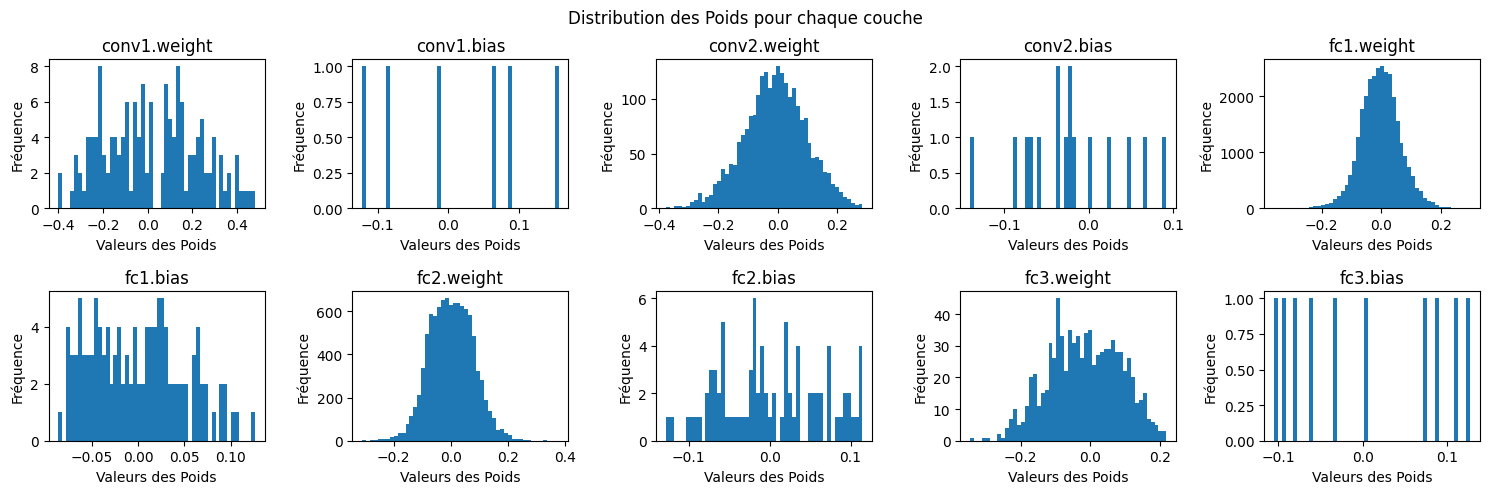

In [19]:
print_weights(net_pruned)

Avant élaguage, les poids sont répartis autours de 0 pour chacune des couches de façon uniforme.

In [20]:
AMOUNT = 0.95
prune_network(net_pruned, AMOUNT)

On applique l'élaguage à 95% de façon global.

In [21]:
test(net_pruned, trainloader)
test(net_pruned, testloader)

Sur 60000 images de test: Précision = 33.317%, Perte moyenne par image = 2.131
Sur 10000 images de test: Précision = 34.010%, Perte moyenne par image = 2.131


(34.01, 2.1306307498057175)

On observe que le modèle pert drastiquement en précision.

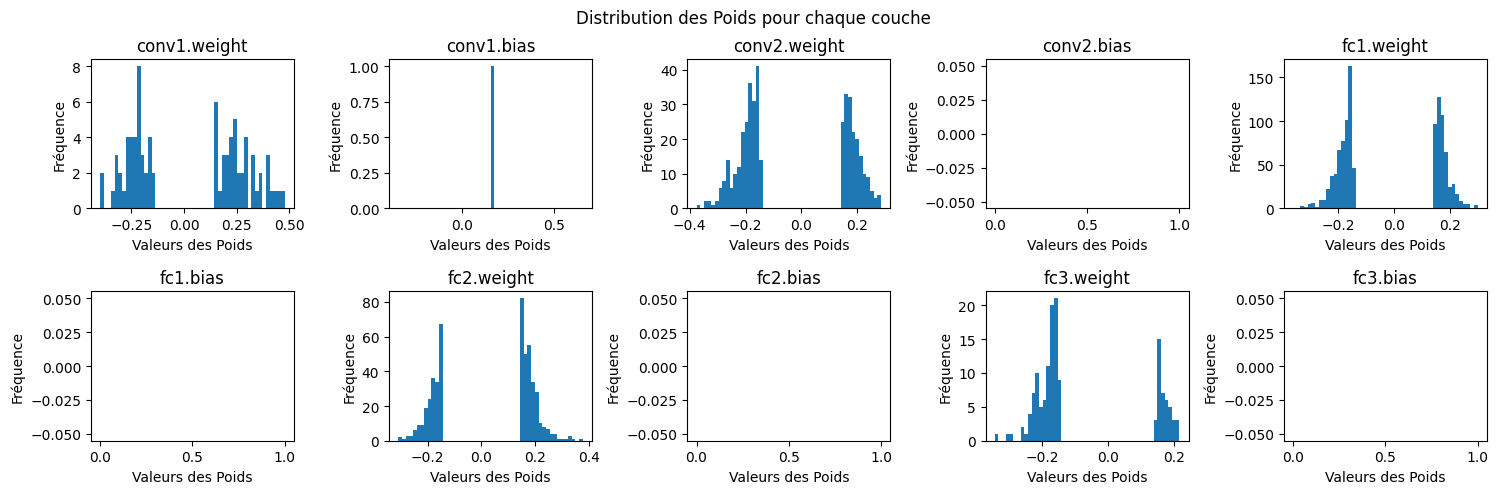

In [22]:
print_weights(net_pruned)

On affiche la répartition des poids non nuls après élaguage, On observe clairement les tranches de poids autours de 0 qui on été supprimés. Certaines matrices de biais n'ont même plus aucun poids (tous les poids sont à 0).

In [23]:
%%time
optimizer = optim.Adam(net_pruned.parameters(), lr=0.001)
retrain(net_pruned, optimizer, n_epoch=3)

Époque 1/3: 100%|██████████| 938/938 [00:17<00:00, 54.12it/s, loss=0.28]


Sur 60000 images de test: Précision = 97.598%, Perte moyenne par image = 0.077
Sur 10000 images de test: Précision = 97.750%, Perte moyenne par image = 0.071


Époque 2/3: 100%|██████████| 938/938 [00:17<00:00, 54.50it/s, loss=0.0671]


Sur 60000 images de test: Précision = 98.232%, Perte moyenne par image = 0.056
Sur 10000 images de test: Précision = 98.330%, Perte moyenne par image = 0.053


Époque 3/3: 100%|██████████| 938/938 [00:16<00:00, 56.38it/s, loss=0.0561]


Sur 60000 images de test: Précision = 98.442%, Perte moyenne par image = 0.049
Sur 10000 images de test: Précision = 98.360%, Perte moyenne par image = 0.050
Entraînement terminé
CPU times: user 1min 34s, sys: 642 ms, total: 1min 35s
Wall time: 1min 36s


(98.36, 0.05011618756242378, 98.44166666666666, 0.04942916802911044)

On réentraîne le modèle élagué (en gardant les poids élagués précédemment nuls) sur 3 époques. On observe que la précision du modèle revient à 98% comme dans le modèle non élagué, alors que 95% de ses connexions (poids/biais) on été supprimés !

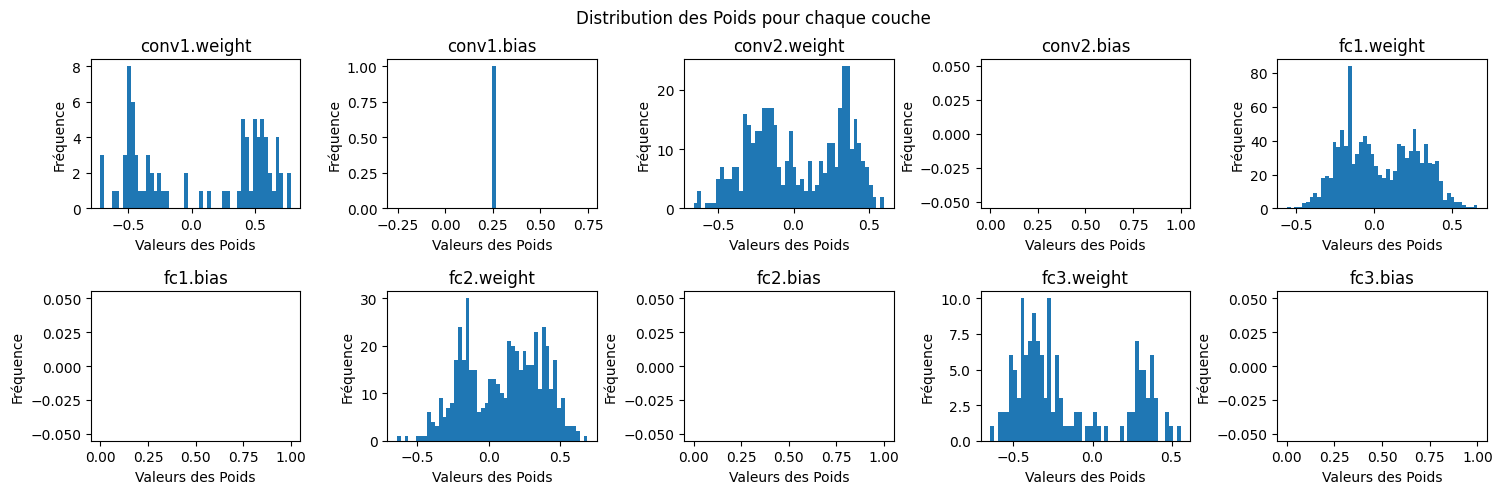

In [24]:
print_weights(net_pruned)

On peut observer la nouvelle répartition des poids. On remarque que les poids se sont re-répartis pour recomblé le vide créé par l'élaguage.

In [ ]:
compute_sparsity(net_pruned)

Sparsité totale: 95.00%  (42205/44426 valeurs nulles)


95.0006752802413

On peut vérifier que le taux de valeurs nulles est toujours à 95%

### 2.2 Elaguage pour différents taux

Après avoir remarqué qu'élaguer les poids de façon global sur la norme L1 (on enlève 95% des poids les plus faible en valeur absolue sur toutes les couches prises ensembles), nous sommes en droit de nous demander à quel point nous pouvons élaguer ce réseau sans perte en précision. C'est ce que nous faisons dans cette partie.

In [ ]:
""" CELLULE FACULTATIVE """
# Elagage non strucuturé L1 pour différents taux
%%time
method = prune.L1Unstructured
scores_prune_perc = []
amounts = [0.92, 0.95, 0.97, 0.99]
lr = 0.001

for i, amount in enumerate(amounts):
  net_pruned = deepcopy(net)
  prune_network(net_pruned, amount=amount, method=method)
  print(f'--- Elaguage du réseau à {amount*100}% ')
  test(net_pruned, trainloader)
  test(net_pruned, testloader)
  optimizer = optim.Adam(net_pruned.parameters(), lr=lr)
  score = retrain(net_pruned, optimizer, n_epoch=3)
  scores_prune_perc.append(score)
  print(f'\n')

--- Elaguage du réseau à 92.0% 
Sur 60000 images de test: Précision = 56.178%, Perte moyenne par image = 1.775
Sur 10000 images de test: Précision = 55.910%, Perte moyenne par image = 1.774


Époque 1/3: 100%|██████████| 938/938 [00:16<00:00, 57.26it/s, loss=0.136]


Sur 60000 images de test: Précision = 98.655%, Perte moyenne par image = 0.044
Sur 10000 images de test: Précision = 98.390%, Perte moyenne par image = 0.049


Époque 2/3: 100%|██████████| 938/938 [00:16<00:00, 58.31it/s, loss=0.0421]


Sur 60000 images de test: Précision = 98.938%, Perte moyenne par image = 0.034
Sur 10000 images de test: Précision = 98.620%, Perte moyenne par image = 0.041


Époque 3/3: 100%|██████████| 938/938 [00:16<00:00, 56.32it/s, loss=0.0356]


Sur 60000 images de test: Précision = 99.040%, Perte moyenne par image = 0.031
Sur 10000 images de test: Précision = 98.740%, Perte moyenne par image = 0.038
Entraînement terminé


--- Elaguage du réseau à 95.0% 
Sur 60000 images de test: Précision = 33.317%, Perte moyenne par image = 2.131
Sur 10000 images de test: Précision = 34.010%, Perte moyenne par image = 2.131


Époque 1/3: 100%|██████████| 938/938 [00:16<00:00, 57.72it/s, loss=0.281]


Sur 60000 images de test: Précision = 97.717%, Perte moyenne par image = 0.074
Sur 10000 images de test: Précision = 97.880%, Perte moyenne par image = 0.066


Époque 2/3: 100%|██████████| 938/938 [00:16<00:00, 58.00it/s, loss=0.0664]


Sur 60000 images de test: Précision = 98.202%, Perte moyenne par image = 0.058
Sur 10000 images de test: Précision = 98.230%, Perte moyenne par image = 0.056


Époque 3/3: 100%|██████████| 938/938 [00:16<00:00, 56.84it/s, loss=0.0559]


Sur 60000 images de test: Précision = 98.447%, Perte moyenne par image = 0.050
Sur 10000 images de test: Précision = 98.400%, Perte moyenne par image = 0.049
Entraînement terminé


--- Elaguage du réseau à 97.0% 
Sur 60000 images de test: Précision = 16.488%, Perte moyenne par image = 2.267
Sur 10000 images de test: Précision = 16.530%, Perte moyenne par image = 2.267


Époque 1/3: 100%|██████████| 938/938 [00:16<00:00, 57.37it/s, loss=0.613]


Sur 60000 images de test: Précision = 94.287%, Perte moyenne par image = 0.188
Sur 10000 images de test: Précision = 94.580%, Perte moyenne par image = 0.177


Époque 2/3: 100%|██████████| 938/938 [00:16<00:00, 58.47it/s, loss=0.159]


Sur 60000 images de test: Précision = 95.823%, Perte moyenne par image = 0.138
Sur 10000 images de test: Précision = 95.960%, Perte moyenne par image = 0.131


Époque 3/3: 100%|██████████| 938/938 [00:16<00:00, 56.68it/s, loss=0.13]


Sur 60000 images de test: Précision = 96.382%, Perte moyenne par image = 0.118
Sur 10000 images de test: Précision = 96.290%, Perte moyenne par image = 0.115
Entraînement terminé


--- Elaguage du réseau à 99.0% 
Sur 60000 images de test: Précision = 9.870%, Perte moyenne par image = 2.302
Sur 10000 images de test: Précision = 9.750%, Perte moyenne par image = 2.302


Époque 1/3: 100%|██████████| 938/938 [00:16<00:00, 58.04it/s, loss=2.15]


Sur 60000 images de test: Précision = 9.872%, Perte moyenne par image = 2.030
Sur 10000 images de test: Précision = 9.800%, Perte moyenne par image = 2.029


Époque 2/3: 100%|██████████| 938/938 [00:16<00:00, 58.49it/s, loss=2.01]


Sur 60000 images de test: Précision = 9.872%, Perte moyenne par image = 2.001
Sur 10000 images de test: Précision = 9.800%, Perte moyenne par image = 2.002


Époque 3/3: 100%|██████████| 938/938 [00:16<00:00, 56.81it/s, loss=2]


Sur 60000 images de test: Précision = 9.872%, Perte moyenne par image = 1.989
Sur 10000 images de test: Précision = 9.800%, Perte moyenne par image = 1.989
Entraînement terminé


CPU times: user 7min 3s, sys: 2.32 s, total: 7min 5s
Wall time: 7min 8s


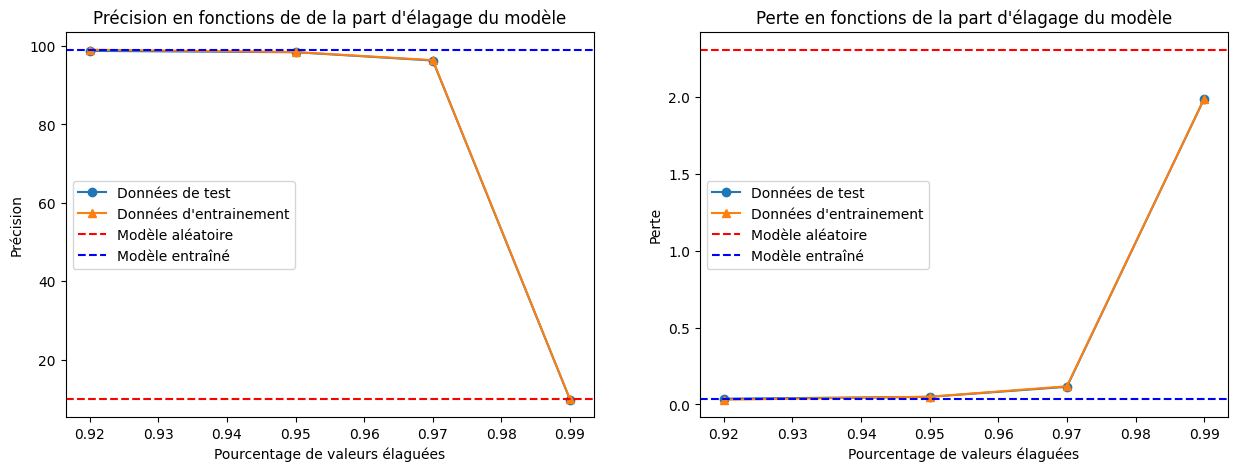

In [ ]:
""" CELLULE FACULTATIVE """
print_scores(amounts, scores_prune_perc, x_label='Pourcentage de valeurs élaguées', title='de la part d\'élagage du modèle')

On observe une légère décroissance de la précision du modèle à partir de 97%. Paux un taux d'élaguage 99%, le modèle n'arrive pas à s'en remettre, le réentrainement n'arrive pas à optimiser les poids restants pour atteindre un soupçon de précision par rapport à un modèle aléatoire (qui se trompe 9 fois sur 10 car 10 classes).

### 2.3 Différentes règles d'élagages.

Lorsque nous élaguons les poids, nous prenons la valeur absolue de tous les poids présents sur toutes les couches prises ensemebles et retirons un certain pourcentage des poids les plus faibles. Cependant, quelle différence avec un élaguage alétoire des poids comme on le ferait dans un dropout par exemple ?

In [25]:
""" CELLULE FACULTATIVE """
# Différent types d'élaguage non structurés (L1, Random)
%%time
pruning_methods = {'L1 Unstructured':prune.L1Unstructured, 'Random Unstructured':prune.RandomUnstructured}
scores_methods = []
amount = 0.95
lr = 0.001
for name in pruning_methods:
  print(f'--- Elagage à {amount*100}% avec la méthode {name}:')
  net_pruned = deepcopy(net)
  prune_network(net_pruned, amount=amount, method=pruning_methods[name])
  compute_sparsity(net_pruned)
  test(net_pruned, trainloader)
  test(net_pruned, testloader)
  optimizer = optim.Adam(net_pruned.parameters(), lr=lr)
  score = retrain(net_pruned, optimizer, n_epoch=3)
  scores_methods.append(score)
  print(f'\n')

--- Elagage à 95.0% avec la méthode L1 Unstructured:
Sparsité totale: 95.00%  (42205/44426 valeurs nulles)
Sur 60000 images de test: Précision = 33.317%, Perte moyenne par image = 2.131
Sur 10000 images de test: Précision = 34.010%, Perte moyenne par image = 2.131


Époque 1/3: 100%|██████████| 938/938 [00:16<00:00, 55.66it/s, loss=0.281]


Sur 60000 images de test: Précision = 97.700%, Perte moyenne par image = 0.074
Sur 10000 images de test: Précision = 97.950%, Perte moyenne par image = 0.069


Époque 2/3: 100%|██████████| 938/938 [00:17<00:00, 55.12it/s, loss=0.0667]


Sur 60000 images de test: Précision = 98.265%, Perte moyenne par image = 0.057
Sur 10000 images de test: Précision = 98.150%, Perte moyenne par image = 0.054


Époque 3/3: 100%|██████████| 938/938 [00:17<00:00, 53.15it/s, loss=0.0563]


Sur 60000 images de test: Précision = 98.492%, Perte moyenne par image = 0.050
Sur 10000 images de test: Précision = 98.450%, Perte moyenne par image = 0.049
Entraînement terminé


--- Elagage à 95.0% avec la méthode Random Unstructured:
Sparsité totale: 95.00%  (42205/44426 valeurs nulles)
Sur 60000 images de test: Précision = 9.808%, Perte moyenne par image = 2.303
Sur 10000 images de test: Précision = 9.900%, Perte moyenne par image = 2.303


Époque 1/3: 100%|██████████| 938/938 [00:16<00:00, 55.59it/s, loss=1.49]


Sur 60000 images de test: Précision = 65.250%, Perte moyenne par image = 0.952
Sur 10000 images de test: Précision = 66.230%, Perte moyenne par image = 0.919


Époque 2/3: 100%|██████████| 938/938 [00:16<00:00, 55.19it/s, loss=0.767]


Sur 60000 images de test: Précision = 74.858%, Perte moyenne par image = 0.687
Sur 10000 images de test: Précision = 75.390%, Perte moyenne par image = 0.671


Époque 3/3: 100%|██████████| 938/938 [00:16<00:00, 56.48it/s, loss=0.663]


Sur 60000 images de test: Précision = 76.575%, Perte moyenne par image = 0.635
Sur 10000 images de test: Précision = 77.190%, Perte moyenne par image = 0.621
Entraînement terminé


CPU times: user 3min 39s, sys: 1.28 s, total: 3min 40s
Wall time: 3min 43s


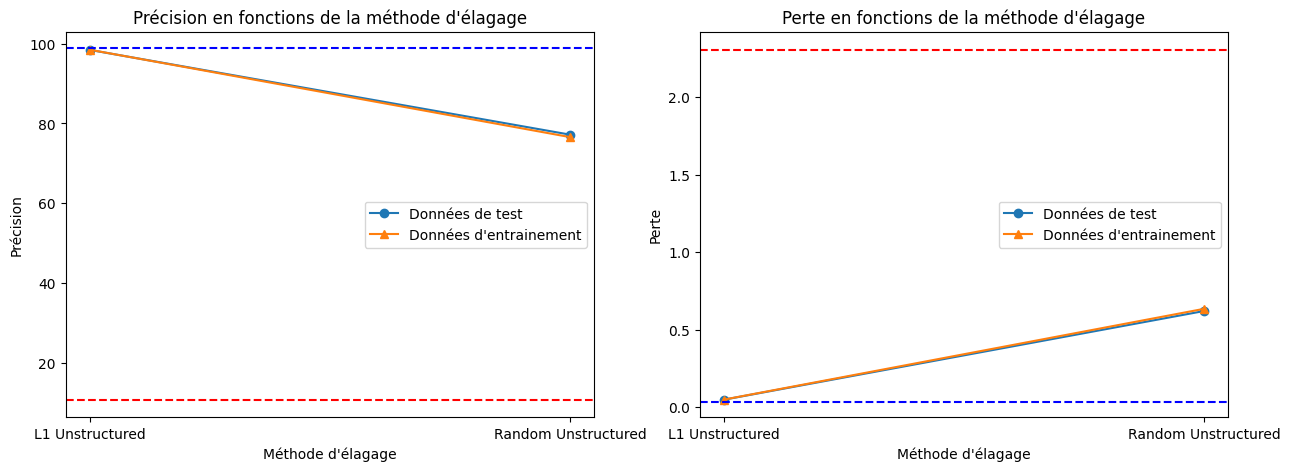

In [29]:
""" CELLULE FACULTATIVE """
pruning_methods_list = ['L1 Unstructured', 'Random Unstructured']
print_scores(pruning_methods_list, scores_methods, x_label='Méthode d\'élagage', title='de la méthode d\'élagage')

On observe que l'élaguage en norme L1 est le meilleur. Après un élagage aléatoire, le modèle arrive quand même, à s'en remmettre mais pas au niveau d'autant.

### 2.4 Elagage couche par couche

Dans élagages précédents, nous supprimions les connexions avec un seuil global, sur toutes les couches confondues. Mais si certaines couches étaient plus importantes que d'autres et que cette importance n'était pas entièrement corrélée à la valeur du seuil d'élaguage ? C'est l'idée explorée dans cette partie, nous supprimons avec des taux de coupe différent les différentes couches.
Dans un réseau CNN comme le notre, les premières couches convolutionnelles tendent à apprendre des caractéristiques de bas niveau (bords, textures), tandis que les couches plus profondes capturent des caractéristiques de haut niveau plus abstraites (formes, objets). La suppression de connexions dans les premières couches pourrait avoir un impact disproportionné sur la capacité du réseau à extraire ces caractéristiques fondamentales, tandis qu'un élagage dans les couches plus profondes pourrait être mieux toléré, à condition que le réseau puisse toujours former des représentations complexes des données.

In [ ]:
""" CELLULE FACULTATIVE """
# Elagage couche par couche
%%time
amount_dict = {'conv1':(0.97, 0.9), 'conv2':(0.97, 0.9), 'fc1':(0.94, 1), 'fc2':(0.94, 1), 'fc3':(0.94, 1)}
method = prune.L1Unstructured
lr = 0.001

sparsity = compute_sparsity(net_pruned, verbose=False)
print(f'--- Elagage à {sparsity}% avec la méthode {method} \n et un élagage par couche suivant: {amount_dict}')
net_pruned = deepcopy(net)
prune_network(net_pruned, amount_dict, method=method)
test(net_pruned, trainloader)
test(net_pruned, testloader)
optimizer = optim.Adam(net_pruned.parameters(), lr=lr)
score = retrain(net_pruned, optimizer, n_epoch=3)
print(f'\n')

--- Elagage à 95.0006752802413% avec la méthode <class 'torch.nn.utils.prune.L1Unstructured'> 
 et un élagage par couche suivant: {'conv1': (0.97, 0.9), 'conv2': (0.97, 0.9), 'fc1': (0.94, 1), 'fc2': (0.94, 1), 'fc3': (0.94, 1)}
Sur 60000 images de test: Précision = 10.557%, Perte moyenne par image = 2.305
Sur 10000 images de test: Précision = 10.390%, Perte moyenne par image = 2.305


Époque 1/3: 100%|██████████| 938/938 [00:17<00:00, 54.94it/s, loss=1.04]


Sur 60000 images de test: Précision = 84.597%, Perte moyenne par image = 0.502
Sur 10000 images de test: Précision = 84.980%, Perte moyenne par image = 0.488


Époque 2/3: 100%|██████████| 938/938 [00:16<00:00, 56.76it/s, loss=0.429]


Sur 60000 images de test: Précision = 88.528%, Perte moyenne par image = 0.374
Sur 10000 images de test: Précision = 88.870%, Perte moyenne par image = 0.363


Époque 3/3: 100%|██████████| 938/938 [00:16<00:00, 56.65it/s, loss=0.35]


Sur 60000 images de test: Précision = 90.023%, Perte moyenne par image = 0.324
Sur 10000 images de test: Précision = 90.270%, Perte moyenne par image = 0.315
Entraînement terminé


CPU times: user 1min 48s, sys: 616 ms, total: 1min 49s
Wall time: 1min 50s


Malheureusement notre simple intuition sur l'importance des différentes couches et d'imposer nous même les différents taux d'élaguage semble moins performante que de couper avec un sueil global sur tout le réseau. Celà pourrait venir du fait que les poids du réseau ont bien été stabilisé autours de 0 de façon normalisé pour toutes les couches pendant l'entrainement initial, les poids proches de 0 reflettant ainsi une importance moindre sur la globalité du réseaux et non sur une couche en elle même.

### 2.5 Elagage structuré

Une autre piste intéressante quoique plus contraignante serait de réaliser un élaguage structuré, enlever des filtres entiers pour une couche convolutionnelles ou des colonnes ou lignes entière pour une une matrice d'une couche dense. Tout comme l'élaguage non structuré, en éliminant des structures entières, l'élagage structuré réduit directement la dimensionnalité des données d'entrée pour les couches suivantes, ce qui peut significativement diminuer le nombre de calculs nécessaires lors de l'inférence. Cela rend le modèle plus léger et plus rapide à exécuter, particulièrement avantageux pour les applications en temps réel et sur des dispositifs à ressources limitées. Contrairement à leurs homologues non structurés, les modèles élagués de manière structuré sont souvent plus facilement déployables sur du matériel standard sans nécessiter de modifications spécifiques ou de support logiciel pour gérer la sparsité. Les architectures matérielles telles que les GPU et les CPU sont optimisées pour des opérations sur des structures de données denses; l'élagage structuré permet de maintenir cette densité, facilitant ainsi l'utilisation efficace de ces architectures.

In [ ]:
""" CELLULE FACULTATIVE """
# Elagage structuré
%%time
amount = 0.5  # Élaguer 50% des canaux
dim = 0  # Pour les Conv2d, dim=0 élaguera des canaux entiers
lr = 0.001

amount_dict = {
    'conv1': (0.8, 0),
    'conv2': (0.8, 0),
    'fc1': (0.2, 1),
    'fc2': (0.2, 1),
    'fc3': (0.2, 1),
}
method_dict = {
    'conv1': (prune.LnStructured, prune.L1Unstructured),
    'conv2': (prune.LnStructured, prune.L1Unstructured),
    'fc1': (prune.LnStructured, prune.L1Unstructured),
    'fc2': (prune.LnStructured, prune.L1Unstructured),
    'fc3': (prune.LnStructured, prune.L1Unstructured),
}
dim_dict = {
    'conv1': 0,
    'conv2': 0,
    'fc1': 1,
    'fc2': 1,
    'fc3': 1,
}

net_pruned = deepcopy(net)
prune_network(net_pruned, amount=amount_dict, method=method_dict, dim=dim)
sparsity = compute_sparsity(net_pruned, verbose=False)
print(f'--- Elagage à {sparsity}% avec \nles méthodes {method_dict} \net un élagage par couche suivant: {amount_dict}\n ')
test(net_pruned, trainloader)
test(net_pruned, testloader)
optimizer = optim.Adam(net_pruned.parameters(), lr=lr)
score = retrain(net_pruned, optimizer, n_epoch=3)
print(f'\n')

--- Elagage à 23.477243055868186% avec 
les méthodes {'conv1': (<class 'torch.nn.utils.prune.LnStructured'>, <class 'torch.nn.utils.prune.L1Unstructured'>), 'conv2': (<class 'torch.nn.utils.prune.LnStructured'>, <class 'torch.nn.utils.prune.L1Unstructured'>), 'fc1': (<class 'torch.nn.utils.prune.LnStructured'>, <class 'torch.nn.utils.prune.L1Unstructured'>), 'fc2': (<class 'torch.nn.utils.prune.LnStructured'>, <class 'torch.nn.utils.prune.L1Unstructured'>), 'fc3': (<class 'torch.nn.utils.prune.LnStructured'>, <class 'torch.nn.utils.prune.L1Unstructured'>)} 
et un élagage par couche suivant: {'conv1': (0.8, 0), 'conv2': (0.8, 0), 'fc1': (0.2, 1), 'fc2': (0.2, 1), 'fc3': (0.2, 1)}
 
Sur 60000 images de test: Précision = 21.500%, Perte moyenne par image = 2.567
Sur 10000 images de test: Précision = 21.280%, Perte moyenne par image = 2.584


Époque 1/3: 100%|██████████| 938/938 [00:16<00:00, 57.58it/s, loss=0.514]


Sur 60000 images de test: Précision = 83.008%, Perte moyenne par image = 0.384
Sur 10000 images de test: Précision = 82.550%, Perte moyenne par image = 0.379


Époque 2/3: 100%|██████████| 938/938 [00:16<00:00, 55.25it/s, loss=0.341]


Sur 60000 images de test: Précision = 85.168%, Perte moyenne par image = 0.318
Sur 10000 images de test: Précision = 84.690%, Perte moyenne par image = 0.324


Époque 3/3: 100%|██████████| 938/938 [00:16<00:00, 57.14it/s, loss=0.299]


Sur 60000 images de test: Précision = 86.220%, Perte moyenne par image = 0.275
Sur 10000 images de test: Précision = 85.640%, Perte moyenne par image = 0.282
Entraînement terminé


CPU times: user 1min 48s, sys: 638 ms, total: 1min 48s
Wall time: 1min 49s


Malheureusement même en ne coupant que 20% des connexions, nous n'atteignons pas la précision initiale avant réentrainement. Celà peut s'expliquer pas le caractère très restrictif de la coupe ainsi que de la difficulté, montrée dans la sous partie précédente (élaguage par couche), de prévoir le taux de coupe optimal par couche.

### 2.6 Elagage non structuré itératif

Nous revenons à l'élagage non structuré qui semble le plus prometteur. Dans les exemples précédents, nous coupions brusquement avec un taux très élevé les connexions puis réentraînons le modèle. N'y a t-il pas moyen d'aller plus en douceur pour que le modèle puisse trouver un état optimal (98% de précision) pour un taux de compression encore plus grand que celui à 95% d'élagage ?

C'est l'idée de l'élagage itératif. L'intégration d'une démarche itérative à l'élagage non structuré permet d'affiner progressivement le processus de compression. À chaque itération, le réseau est évalué, certains poids sont élagués en fonction d'un critère préétabli, puis le modèle est réentrainé pour récupérer ou même améliorer sa performance par rapport à l'itération précédente. Ce cycle peut être répété plusieurs fois, augmentant graduellement le taux d'élagage à chaque étape.



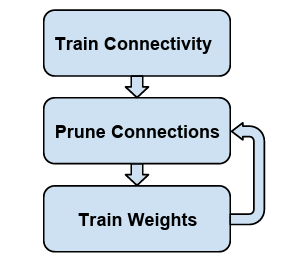

**`Figure 3: Elagage itératif.`**

In [ ]:
""" CELLULE FACULTATIVE """
# Elaguage itératif non structuré
%%time
method = prune.L1Unstructured
scores_iterative_pruning = []
amounts = [0.92, 0.95, 0.97, 0.99]
lr = 0.001

net_pruned = deepcopy(net)
for i, amount in enumerate(amounts):
  prune_network(net_pruned, amount=amount, method=method)
  print(f'--- Itération {i}, élaguage du réseau à {amount*100}% ')
  test(net_pruned, trainloader)
  test(net_pruned, testloader)
  optimizer = optim.Adam(net_pruned.parameters(), lr=lr)
  score = retrain(net_pruned, optimizer, n_epoch=3)
  scores_iterative_pruning.append(score)
  print(f'\n')

--- Itération 0, élaguage du réseau à 92.0% 
Sur 60000 images de test: Précision = 56.178%, Perte moyenne par image = 1.775
Sur 10000 images de test: Précision = 55.910%, Perte moyenne par image = 1.774


Époque 1/3: 100%|██████████| 938/938 [00:16<00:00, 57.93it/s, loss=0.133]


Sur 60000 images de test: Précision = 98.392%, Perte moyenne par image = 0.050
Sur 10000 images de test: Précision = 98.310%, Perte moyenne par image = 0.051


Époque 2/3: 100%|██████████| 938/938 [00:16<00:00, 55.99it/s, loss=0.0418]


Sur 60000 images de test: Précision = 98.865%, Perte moyenne par image = 0.036
Sur 10000 images de test: Précision = 98.600%, Perte moyenne par image = 0.041


Époque 3/3: 100%|██████████| 938/938 [00:16<00:00, 57.96it/s, loss=0.036]


Sur 60000 images de test: Précision = 99.002%, Perte moyenne par image = 0.032
Sur 10000 images de test: Précision = 98.670%, Perte moyenne par image = 0.040
Entraînement terminé


--- Itération 1, élaguage du réseau à 95.0% 
Sur 60000 images de test: Précision = 92.225%, Perte moyenne par image = 0.287
Sur 10000 images de test: Précision = 92.070%, Perte moyenne par image = 0.305


Époque 1/3: 100%|██████████| 938/938 [00:16<00:00, 57.95it/s, loss=0.0447]


Sur 60000 images de test: Précision = 98.913%, Perte moyenne par image = 0.035
Sur 10000 images de test: Précision = 98.570%, Perte moyenne par image = 0.041


Époque 2/3: 100%|██████████| 938/938 [00:16<00:00, 55.39it/s, loss=0.0354]


Sur 60000 images de test: Précision = 98.988%, Perte moyenne par image = 0.032
Sur 10000 images de test: Précision = 98.680%, Perte moyenne par image = 0.041


Époque 3/3: 100%|██████████| 938/938 [00:16<00:00, 57.98it/s, loss=0.0322]


Sur 60000 images de test: Précision = 99.095%, Perte moyenne par image = 0.029
Sur 10000 images de test: Précision = 98.780%, Perte moyenne par image = 0.037
Entraînement terminé


--- Itération 2, élaguage du réseau à 97.0% 
Sur 60000 images de test: Précision = 59.775%, Perte moyenne par image = 1.297
Sur 10000 images de test: Précision = 59.280%, Perte moyenne par image = 1.304


Époque 1/3: 100%|██████████| 938/938 [00:15<00:00, 59.07it/s, loss=0.138]


Sur 60000 images de test: Précision = 98.187%, Perte moyenne par image = 0.059
Sur 10000 images de test: Précision = 98.090%, Perte moyenne par image = 0.064


Époque 2/3: 100%|██████████| 938/938 [00:16<00:00, 55.21it/s, loss=0.0547]


Sur 60000 images de test: Précision = 98.517%, Perte moyenne par image = 0.048
Sur 10000 images de test: Précision = 98.230%, Perte moyenne par image = 0.054


Époque 3/3: 100%|██████████| 938/938 [00:16<00:00, 57.59it/s, loss=0.0476]


Sur 60000 images de test: Précision = 98.598%, Perte moyenne par image = 0.043
Sur 10000 images de test: Précision = 98.290%, Perte moyenne par image = 0.051
Entraînement terminé


--- Itération 3, élaguage du réseau à 99.0% 
Sur 60000 images de test: Précision = 29.112%, Perte moyenne par image = 2.215
Sur 10000 images de test: Précision = 30.240%, Perte moyenne par image = 2.197


Époque 1/3: 100%|██████████| 938/938 [00:16<00:00, 56.55it/s, loss=1.09]


Sur 60000 images de test: Précision = 77.817%, Perte moyenne par image = 0.706
Sur 10000 images de test: Précision = 78.430%, Perte moyenne par image = 0.672


Époque 2/3: 100%|██████████| 938/938 [00:16<00:00, 57.16it/s, loss=0.633]


Sur 60000 images de test: Précision = 82.167%, Perte moyenne par image = 0.581
Sur 10000 images de test: Précision = 82.850%, Perte moyenne par image = 0.545


Époque 3/3: 100%|██████████| 938/938 [00:17<00:00, 55.04it/s, loss=0.55]


Sur 60000 images de test: Précision = 84.125%, Perte moyenne par image = 0.519
Sur 10000 images de test: Précision = 84.900%, Perte moyenne par image = 0.487
Entraînement terminé


CPU times: user 7min 9s, sys: 2.22 s, total: 7min 12s
Wall time: 7min 15s


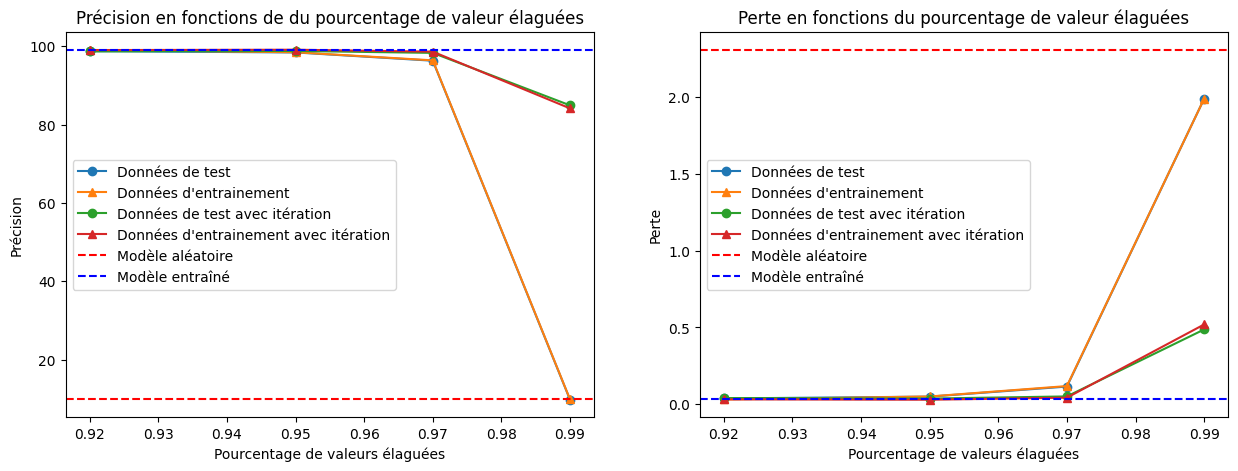

In [ ]:
""" CELLULE FACULTATIVE """
print_scores(amounts, scores_prune_perc, x_label='Pourcentage de valeurs élaguées', title='du pourcentage de valeur élaguées',
             scores_bis=scores_iterative_pruning, scores_bis_label_prefix='avec itération')

Y aller de façon fine était une très bonne idée ! La comparaison entre la méthode itérative et la méthode brusque en est la preuve. Jusqu'à 97% de coupe, le réseaux avec élaguage itératif garde sa précsion initial. Même élagué à 99%, le réseau avec itération arrive à garder à 84%  précision tandis que le modèle avec coupe brusque equivaut à un classifieur aléatoire.

### 2.7 Application de la meilleur stratégie d'élagage

Dans cette dernière sous partie, nous appliquons la meilleur technique trouvée, l'élagage itératif jusqu'à 97%.

In [ ]:
# Meilleur perfomance/élaguage
%%time
method = prune.L1Unstructured
scores_iterative_pruning_final = []
amounts = [0.90, 0.93, 0.95, 0.96, 0.965, 0.97]
lr = 0.001

net_pruned = deepcopy(net)
for i, amount in enumerate(amounts):
  prune_network(net_pruned, amount=amount, method=method)
  print(f'--- Itération {i}, élaguage du réseau à {amount*100}% ')
  test(net_pruned, trainloader)
  test(net_pruned, testloader)
  optimizer = optim.Adam(net_pruned.parameters(), lr=lr)
  score = retrain(net_pruned, optimizer, n_epoch=3)
  scores_iterative_pruning_final.append(score)
  print(f'\n')

net_pruned_accuracy_test, net_pruned_loss_test, net_pruned_accuracy_train, net_pruned_loss_train = scores_iterative_pruning_final[-1]

--- Itération 0, élaguage du réseau à 90.0% 
Sur 60000 images de test: Précision = 71.712%, Perte moyenne par image = 1.440
Sur 10000 images de test: Précision = 71.710%, Perte moyenne par image = 1.437


Époque 1/3: 100%|██████████| 938/938 [00:17<00:00, 54.67it/s, loss=0.0895]


Sur 60000 images de test: Précision = 98.937%, Perte moyenne par image = 0.034
Sur 10000 images de test: Précision = 98.710%, Perte moyenne par image = 0.038


Époque 2/3: 100%|██████████| 938/938 [00:17<00:00, 53.06it/s, loss=0.0342]


Sur 60000 images de test: Précision = 98.995%, Perte moyenne par image = 0.030
Sur 10000 images de test: Précision = 98.690%, Perte moyenne par image = 0.039


Époque 3/3: 100%|██████████| 938/938 [00:18<00:00, 51.45it/s, loss=0.0292]


Sur 60000 images de test: Précision = 99.115%, Perte moyenne par image = 0.027
Sur 10000 images de test: Précision = 98.660%, Perte moyenne par image = 0.038
Entraînement terminé


--- Itération 1, élaguage du réseau à 93.0% 
Sur 60000 images de test: Précision = 96.520%, Perte moyenne par image = 0.106
Sur 10000 images de test: Précision = 96.140%, Perte moyenne par image = 0.118


Époque 1/3: 100%|██████████| 938/938 [00:17<00:00, 54.57it/s, loss=0.032]


Sur 60000 images de test: Précision = 99.238%, Perte moyenne par image = 0.025
Sur 10000 images de test: Précision = 98.880%, Perte moyenne par image = 0.035


Époque 2/3: 100%|██████████| 938/938 [00:17<00:00, 52.54it/s, loss=0.0264]


Sur 60000 images de test: Précision = 99.315%, Perte moyenne par image = 0.022
Sur 10000 images de test: Précision = 98.760%, Perte moyenne par image = 0.036


Époque 3/3: 100%|██████████| 938/938 [00:17<00:00, 54.76it/s, loss=0.0242]


Sur 60000 images de test: Précision = 99.383%, Perte moyenne par image = 0.020
Sur 10000 images de test: Précision = 98.800%, Perte moyenne par image = 0.034
Entraînement terminé


--- Itération 2, élaguage du réseau à 95.0% 
Sur 60000 images de test: Précision = 78.910%, Perte moyenne par image = 0.608
Sur 10000 images de test: Précision = 79.360%, Perte moyenne par image = 0.576


Époque 1/3: 100%|██████████| 938/938 [00:17<00:00, 53.43it/s, loss=0.0438]


Sur 60000 images de test: Précision = 99.145%, Perte moyenne par image = 0.027
Sur 10000 images de test: Précision = 98.690%, Perte moyenne par image = 0.040


Époque 2/3: 100%|██████████| 938/938 [00:17<00:00, 54.79it/s, loss=0.0271]


Sur 60000 images de test: Précision = 99.320%, Perte moyenne par image = 0.022
Sur 10000 images de test: Précision = 98.790%, Perte moyenne par image = 0.037


Époque 3/3: 100%|██████████| 938/938 [00:17<00:00, 53.77it/s, loss=0.0243]


Sur 60000 images de test: Précision = 99.377%, Perte moyenne par image = 0.020
Sur 10000 images de test: Précision = 98.750%, Perte moyenne par image = 0.038
Entraînement terminé


--- Itération 3, élaguage du réseau à 96.0% 
Sur 60000 images de test: Précision = 85.822%, Perte moyenne par image = 0.423
Sur 10000 images de test: Précision = 84.970%, Perte moyenne par image = 0.451


Époque 1/3: 100%|██████████| 938/938 [00:17<00:00, 53.06it/s, loss=0.0422]


Sur 60000 images de test: Précision = 99.100%, Perte moyenne par image = 0.028
Sur 10000 images de test: Précision = 98.580%, Perte moyenne par image = 0.043


Époque 2/3: 100%|██████████| 938/938 [00:17<00:00, 53.28it/s, loss=0.0288]


Sur 60000 images de test: Précision = 99.162%, Perte moyenne par image = 0.026
Sur 10000 images de test: Précision = 98.690%, Perte moyenne par image = 0.039


Époque 3/3: 100%|██████████| 938/938 [00:17<00:00, 54.94it/s, loss=0.0259]


Sur 60000 images de test: Précision = 99.305%, Perte moyenne par image = 0.022
Sur 10000 images de test: Précision = 98.730%, Perte moyenne par image = 0.040
Entraînement terminé


--- Itération 4, élaguage du réseau à 96.5% 
Sur 60000 images de test: Précision = 88.930%, Perte moyenne par image = 0.348
Sur 10000 images de test: Précision = 88.900%, Perte moyenne par image = 0.358


Époque 1/3: 100%|██████████| 938/938 [00:16<00:00, 55.49it/s, loss=0.0371]


Sur 60000 images de test: Précision = 99.127%, Perte moyenne par image = 0.027
Sur 10000 images de test: Précision = 98.630%, Perte moyenne par image = 0.042


Époque 2/3: 100%|██████████| 938/938 [00:20<00:00, 45.36it/s, loss=0.028]


Sur 60000 images de test: Précision = 99.222%, Perte moyenne par image = 0.024
Sur 10000 images de test: Précision = 98.660%, Perte moyenne par image = 0.043


Époque 3/3: 100%|██████████| 938/938 [00:17<00:00, 54.88it/s, loss=0.0259]


Sur 60000 images de test: Précision = 99.193%, Perte moyenne par image = 0.024
Sur 10000 images de test: Précision = 98.700%, Perte moyenne par image = 0.041
Entraînement terminé


--- Itération 5, élaguage du réseau à 97.0% 
Sur 60000 images de test: Précision = 86.893%, Perte moyenne par image = 0.419
Sur 10000 images de test: Précision = 86.410%, Perte moyenne par image = 0.455


Époque 1/3: 100%|██████████| 938/938 [00:17<00:00, 54.38it/s, loss=0.047]


Sur 60000 images de test: Précision = 98.922%, Perte moyenne par image = 0.034
Sur 10000 images de test: Précision = 98.520%, Perte moyenne par image = 0.047


Époque 2/3: 100%|██████████| 938/938 [00:17<00:00, 52.83it/s, loss=0.0336]


Sur 60000 images de test: Précision = 99.045%, Perte moyenne par image = 0.030
Sur 10000 images de test: Précision = 98.530%, Perte moyenne par image = 0.047


Époque 3/3: 100%|██████████| 938/938 [00:17<00:00, 53.23it/s, loss=0.0311]


Sur 60000 images de test: Précision = 99.072%, Perte moyenne par image = 0.029
Sur 10000 images de test: Précision = 98.490%, Perte moyenne par image = 0.047
Entraînement terminé


CPU times: user 11min 16s, sys: 4.03 s, total: 11min 20s
Wall time: 11min 29s


On observe que notre itération douce nous préserve une précision de l'ordre de celle initiale et ceux en ne gradantq ue 3% des connexions !

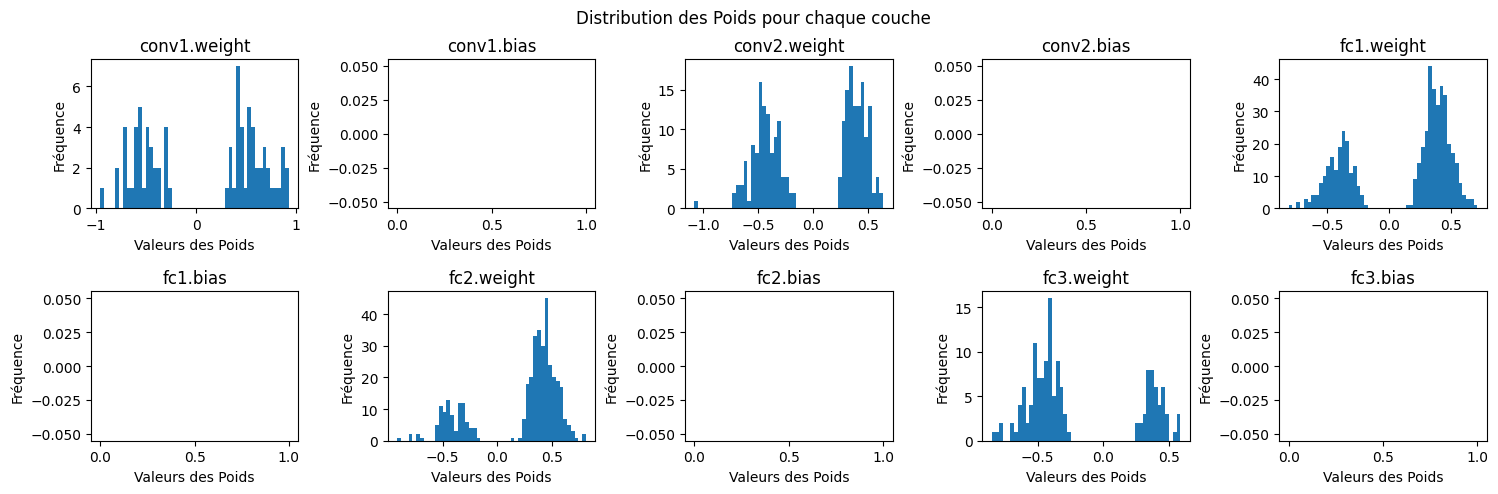

In [31]:
print_weights(net_pruned)

Nous pouvons sauvegarder le meilleur modèle obtenu.

In [ ]:
path = 'LeNetTrainedPruned.pth'
save_model(model=net_pruned, path=path)

### 2.8 Bilan sur l'élagage

**`Cellule checkpoint:`** Décommenter cette cellule pour accéder au modèle élagué si vous n'avez pas eu le temps d'entraîner le modèle final.

In [30]:
# path = 'LeNetTrainedPruned.pth'
# state_dict = torch.load(path, map_location=torch.device(device))
# net_pruned = LeNet()
# net_pruned.load_state_dict(state_dict)
# net_pruned.to(device)

# net_pruned_accuracy_train, net_pruned_loss_train = test(net, trainloader)
# net_pruned_accuracy_test, net_pruned_loss_test = test(net, testloader)

Sur 60000 images de test: Précision = 99.353%, Perte moyenne par image = 0.020
Sur 10000 images de test: Précision = 98.960%, Perte moyenne par image = 0.033


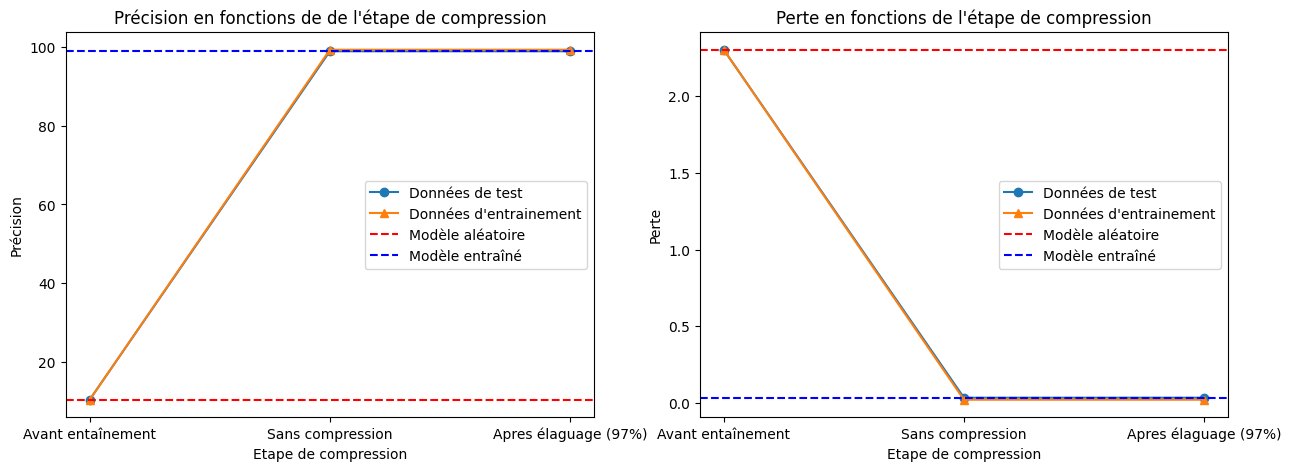

In [ ]:
compression_state = ['Avant entaînement', 'Sans compression', 'Apres élaguage (97%)']
scores = [(accuracy_random, loss_random, accuracy_random, loss_random),
          (net_accuracy_test, net_loss_test, net_accuracy_train, net_loss_train),
          (net_pruned_accuracy_test, net_pruned_loss_test, net_pruned_accuracy_train, net_pruned_loss_train)]

print_scores(compression_state, scores,
             x_label='Etape de compression',
             title='de l\'étape de compression',
             )

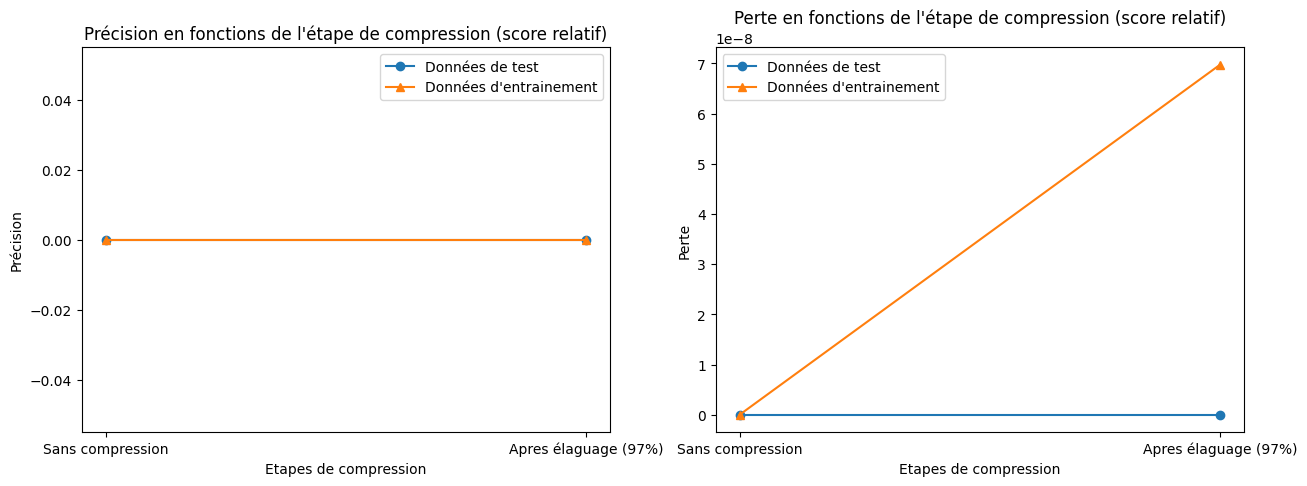

In [ ]:
compression_state = ['Sans compression', 'Apres élaguage (97%)']
scores = [(0,0,0,0),
          (net_pruned_accuracy_test-net_accuracy_test, net_pruned_loss_test-net_loss_test, net_pruned_accuracy_train-net_accuracy_train, net_pruned_loss_train-net_loss_train)]

print_scores(compression_state, scores,
             x_label='Etapes de compression',
             title='de l\'étape de compression (score relatif)',
             random_baseline=False,
             train_baseline=False
             )

On affiche la perte et la précision après la première étape de compression (elle est minime).

**🖊🧑 Exercice:** Déterminer la taille nécessaire pour stocker les poids du modèle après élagage non structuré global à 97%. \
- On suppose que l'on ne stocke pas la structure du modèle (les dimensions, ordre, types de couches ne sont pas prise en compte dans le calculs - seulement les poids).
- On suppose également que l'on connaît l'encodage (nombre de bits pour lesquel les nombres sont encodés chaque tenseur).


**☝  Solution:**  <details class="alert alert-danger">
    <summary markdown="span"><b>Prêt à voir la solution </b></summary>

Les dimensions des tenseurs de poids pour chaque couche sont déjà connus, nous pouvons donc stocker les valeurs des poids en ligne (liste). Sachant que 97% des poids sont à 0 nous pouvons être un peu malin et utiliser la structure suivante:
- liste de poids non nuls
- index de la position de ces poids

Les poids restent encodés sur 32 bits. Cependant pour encoder les index nous avons besoin de connaître la taille des tenseurs de poids pour chaque couches (biais/poids) pour encoder sur un minimum de bits.

Si les tenseur sont vides nous considérons que leur taille est 0 bit. En effet on peut considérer que l'on sauvegarde chaque tenseur de poids/biais/index dans un fichier et que par convention si le fichier est vide, tous les poids sont à 0.

```
# Pour plus de clareté dans le calcul nous détaillons tout couche par couche

# Nombre total de poids/biais non nul
total_weight_after_pruning_per_tensor = compute_sparsity(net_pruned, verbose=False, return_non_zero_el=False, return_sparcity_by_layer=True)

# Dimensions des poids pour chaque couche

print(total_weight_after_pruning_per_tensor)

# Poids
# Convolutional layers
conv1_weights = total_weight_after_pruning_per_tensor['conv1.weight'][1] # 78
conv2_weights = total_weight_after_pruning_per_tensor['conv2.weight'][1] # 231
# Fully connected layers
fc1_weights   = total_weight_after_pruning_per_tensor['fc1.weight'][1] # 499
fc2_weights   = total_weight_after_pruning_per_tensor['fc2.weight'][1] # 382
fc3_weights   = total_weight_after_pruning_per_tensor['fc3.weight'][1] # 143
# Biais
# Convolutional layers
conv1_bias = total_weight_after_pruning_per_tensor['conv1.bias'][1] # 0
conv2_bias = total_weight_after_pruning_per_tensor['conv2.bias'][1] # 0
# Fully connected layers
fc1_bias   = total_weight_after_pruning_per_tensor['fc1.bias'][1] # 0
fc2_bias   = total_weight_after_pruning_per_tensor['fc2.bias'][1] # 0
fc3_bias   = total_weight_after_pruning_per_tensor['fc3.bias'][1] # 0

# Nombre total de poids et biais
total_weight_after_pruning = conv1_weights + conv2_weights + fc1_weights + fc2_weights + fc3_weights # 1333
total_bias_after_pruning = conv1_bias + conv2_bias + fc1_bias + fc2_bias + fc3_bias                  # 0
total_weights_bias_after_pruning = total_weight_after_pruning + total_bias_after_pruning             # 1333

# Représentation des poids sur 32 bits
weight_size = net.conv1.weight.element_size() * 8 # 32

# Représentation des index par tenseur poids/biais
conv1_weights_index_size = math.ceil(math.log(conv1_weights, 2)) if conv1_weights !=0 else 0 # 7
conv2_weights_index_size = math.ceil(math.log(conv2_weights, 2)) if conv2_weights !=0 else 0 # 9
fc1_weights_index_size =   math.ceil(math.log(fc1_weights, 2))   if fc1_weights !=0 else 0   # 9
fc2_weights_index_size =   math.ceil(math.log(fc2_weights, 2))   if fc2_weights !=0 else 0   # 9
fc3_weights_index_size =   math.ceil(math.log(fc3_weights, 2))   if fc3_weights !=0 else 0   # 8

conv1_bias_index_size = math.ceil(math.log(conv1_bias, 2)) if conv1_bias !=0 else 0 # 0
conv2_bias_index_size = math.ceil(math.log(conv2_bias, 2)) if conv2_bias !=0 else 0 # 0
fc1_bias_index_size =   math.ceil(math.log(fc1_bias, 2))   if fc1_bias !=0 else 0   # 0
fc2_bias_index_size =   math.ceil(math.log(fc2_bias, 2))   if fc2_bias !=0 else 0   # 0
fc3_bias_index_size =   math.ceil(math.log(fc3_bias, 2))   if fc3_bias !=0 else 0   # 0

# Taille en bits/octets/Mo
total_bits_pruned_weights_bias = total_weight_after_pruning * weight_size
total_bits_pruned_index = (conv1_weights*conv1_weights_index_size + conv2_weights*conv2_weights_index_size \
                           + fc1_weights*fc1_weights_index_size + fc2_weights*fc2_weights_index_size + fc3_weights*fc3_weights_index_size \
                           + conv1_bias*conv1_bias_index_size + conv2_bias*conv2_bias_index_size \
                           + fc1_bias*fc1_bias_index_size + fc2_bias*fc2_bias_index_size + fc3_bias*fc3_bias_index_size)
total_bits_pruned = total_bits_pruned_weights_bias + total_bits_pruned_index
total_bytes_pruned = total_bits_pruned / 8
total_megabytes_pruned = total_bytes_pruned / (1024 ** 2)

print(f'Taille du modèle initial en bits = {total_bits}')
print(f'Taille du modèle initial en octets = {total_bytes}')
print(f'Taille du modèle initial en Mega Octets = {total_megabytes}')

print(f'Taille du modèle après élagage 97% en bits = {total_bits_pruned}')
print(f'Taille du modèle après élagage 97% en en octets = {total_bytes_pruned}')
print(f'Taille du modèle après élagage 97% en en Mega Octets = {total_megabytes_pruned}')

```

Taille du modèle initial en bits = 1421632 \
Taille du modèle initial en octets = 177704.0 \
Taille du modèle initial en Mega Octets = 0.16947174072265625 \
Taille du modèle après élagage 97% en bits = 54123 \
Taille du modèle après élagage 97% en en octets = 6765.375 \
Taille du modèle après élagage 97% en en Mega Octets = 0.006451964378356934 \
</details>

**`Taille, Précision et Perte : modèle élagué entraîné (compression étape 1)`**

**- Taille** = 54 123 bits

**- Précision - entrainement** = 99.353% \
**- Précision - test** = 98.960%

**- Perte - entrainement** = 0.020 \
**- Perte - test** = 0.033

## 3. Quantification par partage de poids

Le partage de poids permet de compresser davantage le réseau élagué en réduisant le nombre de bits requis pour représenter chaque poids. Nous limitons le nombre de poids effectifs à stocker en faisant en sorte que plusieurs connexions partagent le même poids, puis nous affinons ces poids partagés et réentraînant le modèle.

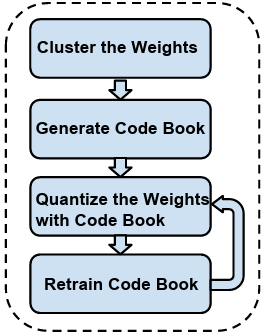

**`Figure 4: Quantification par partage de poids.`**



Pour  identifier les poids à partager, nous réalisons pour chaque couche du réseau (chaque tenseur de poids/biais pour être précis), un regroupement **`K-MEANS`**, de sorte que tous les poids tombant dans le même groupe partagent le même poids. Les poids ne sont partagés qu'au sein d'une même couche.

Ainsi pour chaque couche, nous partitionnons les $(n)$ poids originaux $(W = w_1w_2...w_n)$ en $(k)$ groupes $(C = c_1c_2...c_k)$, $(n \geq k)$, afin de minimiser la somme des carrés intra-groupes $(WCSS)$ :

$$
\arg\min\limits_{c}\sum\limits_{i=1}^{k}\sum\limits_{w\in c_i}|w - c_i|^2
$$

L'initialisation des centroïdes impacte la qualité des regroupement et affecte ainsi la précision de prédiction du réseau. Nous examinerons trois méthodes d'initialisation : Forgy (aléatoire), basée sur la densité et linéaire.

Après avoir trouvé les les nouveaux poids partagés du réseau à l'aide l'algorithme **`K-MEANS`**, nous mettons à jour les nouveaux poids. Le gradient pour chaque poids partagé est calculé et utilisé pour mettre à jour le poids partagé.

Nous notons la perte par $\mathcal{L}$, le poids dans la colonne $i$ et la ligne $j$ par $W_{ij}$, l'index du centroïde de l'élément $W_{ij}$ par $I_{ij}$, le $k$-ième centroïde de la couche par $C_k$. En utilisant la fonction indicatrice $\mathbb{1}(.)$, le gradient des centroïdes est calculé comme :

$$\frac{\partial \mathcal{L}}{\partial C_k}=\sum\limits_{i, j} \frac{\partial \mathcal{L}}{\partial W_{i j}} \frac{\partial W_{i j}}{\partial C_k}=\sum\limits_{i, j} \frac{\partial \mathcal{L}}{\partial W_{i j}} \mathbb{1} (I_{i j}=k)$$

Autrement dit, pour chaque couche, chaque poids est mis à jour en lui enjoutant la somme des gradients associé à son cluster.

Pour une couche, si on note $l_r$ le taux d'apprentissage:

 $$\forall i,j \quad W_{i j} = W_{i j} + l_r *  \sum\limits_{i, j} \frac{\partial \mathcal{L}}{\partial W_{i j}} \mathbb{1} (I_{i j}=k)$$



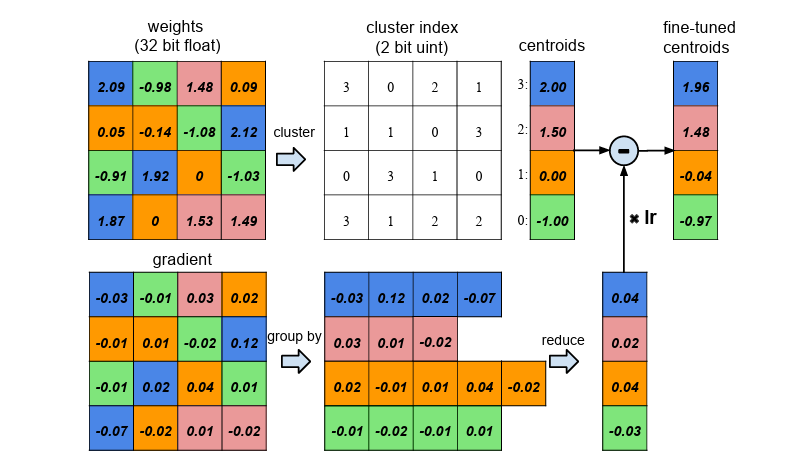

**`Figure 5: Clustering des poids sur une couche avec réentrainement.`**


**`Sommaire de la partie`**:
- **3.0** Implémentation du problème
- **3.1** Application du partage de poids avec réentraînement sur le réseau `LeNet` élagué
- **3.2** Discussion sur la méthode d'initialisation des centroïdes avant l'algorithme `K-MEANS`
- **3.3** Exploration de différents taux de quantisation (nombre des centroïdes par couches)
- **3.4** Exploration de la quantisation itérative
- **3.5** Application du meilleur paramétrage de partage de poids trouvé
- **3.6** Bilan sur le partage de poids

### 3.0 Implémentation du problème

Afin d'implémenter la quantisation par partage de poids, nous définissons deux principales fonctions:
- `apply_weight_sharing` qui réalise un clustering K-MEANS pour chaque couche. Soit $bits_i$, le nombre de bits sur laquelle la couche $i$ pourra être encodé. Si on note $N_{cluster, i}$ le nombre de clusters associé à la couche $i$, alors on a $N_{cluster, i} = 2^{bits_i}$. La fonction permets donc de choisir le nombre de bits d'encodage pour chaque couche ainsi que la méthode d'initialisation de centroïdes : *linear*, *random*, *density*
- `retrain_on_weight_shared` qui réentraîne le réseau en appliquant une rétropropagation puis somme les gradients d'un cluster pour mettre à jours les poids correspondants, comme expliqué en début de partie. La fonction prendra aussi garde à ne pas mettre à jour les poids à 0. On annulera donc leur gradient comme dans la partie précédente juste avant la mise à jour des poids.

In [32]:
def apply_weight_sharing(net, bits=5, weight_init='linear', bias=False):
    """
    Applies weight and bias sharing to the given model for Conv2d and Linear layers
    """
    assert weight_init in ['linear', 'random', 'density'], "Invalid weight initializer. Choose 'linear', 'random', or 'density'."
    is_local = isinstance(bits, dict)
    if not is_local:
        bits = {name: (bits, bits) for name, _ in net.named_children()}

    bit_size_list = []
    for name, module in net.named_children():
        # Process weights
        if hasattr(module, 'weight') and isinstance(module.weight, torch.nn.Parameter) and name in bits.keys():
            process_shared_layer(module.weight, bits[name][0], weight_init, name+'_weight', bit_size_list)
        # Process biases if required
        if bias and hasattr(module, 'bias') and module.bias is not None:
            process_shared_layer(module.bias, bits[name][1], weight_init, name+'_bias', bit_size_list)

    return bit_size_list


def process_shared_layer_old(tensor, bits, weight_init, name, bit_size_list):
    original_tensor = tensor.data.cpu().numpy()
    shape_tensor = original_tensor.shape
    flattened_tensor = original_tensor.flatten()

    # Clustering
    min_tensor = flattened_tensor.min()
    max_tensor = flattened_tensor.max()

    if weight_init == 'linear':
        space_tensor = np.linspace(min_tensor, max_tensor, num=2**bits)
    elif weight_init == 'random':
        space_tensor = np.random.uniform(min_tensor, max_tensor, size=2**bits)
    elif weight_init == 'density':
        space_tensor = apply_density_based_initialization(flattened_tensor, bits)

    kmeans = KMeans(n_clusters=len(space_tensor), init=space_tensor.reshape(-1, 1), n_init=1, algorithm="lloyd")
    kmeans.fit(flattened_tensor.reshape(-1, 1))
    new_tensor = kmeans.cluster_centers_[kmeans.labels_].reshape(-1)

    # Mise à jour des poids avec les centroids
    tensor.data = torch.from_numpy(new_tensor.reshape(shape_tensor)).to(device)

    # Stockage de l'index des centroids pour chaque poid
    centroid_indices = kmeans.labels_.reshape(shape_tensor)
    if hasattr(tensor, 'centroid_indices'):
        tensor.centroid_indices = torch.from_numpy(centroid_indices).to(device)
    else:
        tensor.__setattr__('centroid_indices', torch.from_numpy(centroid_indices).to(device))

    bit_size_list.append((name, 2**bits))

def process_shared_layer(tensor, bits, weight_init, name, bit_size_list):
    original_tensor = tensor.data.cpu().numpy()
    shape_tensor = original_tensor.shape
    flattened_tensor = original_tensor.flatten()

    # Identification des poids nuls et non nuls
    non_zero_mask = flattened_tensor != 0
    non_zero_flattened_tensor = flattened_tensor[non_zero_mask]

    # Si le tenseur ne contient que des zéros, pas de Kmean, tous les poids sont déjà les mêmes
    if np.all(flattened_tensor == 0):
        bit_size_list.append((name, 0))
        return

    # Clustering sur les poids non nuls
    min_tensor = non_zero_flattened_tensor.min()
    max_tensor = non_zero_flattened_tensor.max()

    if weight_init == 'linear':
        space_tensor = np.linspace(min_tensor, max_tensor, num=2**bits)
    elif weight_init == 'random':
        space_tensor = np.random.uniform(min_tensor, max_tensor, size=2**bits)
    elif weight_init == 'density':
        space_tensor = apply_density_based_initialization(non_zero_flattened_tensor, bits)

    kmeans = KMeans(n_clusters=len(space_tensor), init=space_tensor.reshape(-1, 1), n_init=1, algorithm="lloyd")
    kmeans.fit(non_zero_flattened_tensor.reshape(-1, 1))
    new_non_zero_flattened_tensor = kmeans.cluster_centers_[kmeans.labels_].flatten()

    # Réintégration des poids nuls et mise à jour du tenseur
    new_flattened_tensor = np.zeros_like(flattened_tensor)
    new_flattened_tensor[non_zero_mask] = new_non_zero_flattened_tensor
    tensor.data = torch.from_numpy(new_flattened_tensor.reshape(shape_tensor)).to(device)

    # Stockage de l'index des centroids pour chaque poids non nul
    centroid_indices = np.zeros_like(flattened_tensor, dtype=int)
    centroid_indices[non_zero_mask] = kmeans.labels_
    if hasattr(tensor, 'centroid_indices'):
        tensor.centroid_indices = torch.from_numpy(centroid_indices.reshape(shape_tensor)).to(device)
    else:
        tensor.__setattr__('centroid_indices', torch.from_numpy(centroid_indices.reshape(shape_tensor)).to(device))

    bit_size_list.append((name, 2**bits))



def apply_density_based_initialization(flattened_tensor, bits):
    # Calcul de l'histogramme des valeurs des poids
    num_bins = 2 ** bits  # Le nombre de bins est basé sur le nombre de bits
    histogram, bin_edges = np.histogram(flattened_tensor, bins=num_bins)

    # Calcul des centres initiaux en prenant le milieu de chaque bin
    # avec un ajustement basé sur la densité des poids dans chaque bin
    initial_centers = []
    for i in range(num_bins):
        bin_center = (bin_edges[i] + bin_edges[i+1]) / 2
        initial_centers.append(bin_center)

    # Convertit la liste des centres initiaux en un tableau numpy
    initial_centers = np.array(initial_centers).reshape(-1, 1)
    return initial_centers

In [33]:
def retrain_on_weight_shared(net, optimizer, n_epoch, scheduler=None):
  criterion = nn.CrossEntropyLoss()
  net.train()
  display_step = 4
  num_batches = len(trainloader)
  display_interval = max(num_batches // display_step, 1)
  for epoch in range(n_epoch):
    running_loss = 0.0
    pbar = tqdm(enumerate(trainloader), total=len(trainloader))
    for i, data in pbar:
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Accumuler les gradients pour les poids partagés dans chaque couche
        for name, module in net.named_children():
            if hasattr(module, 'weight'):
                update_shared_weight(module.weight)
            if hasattr(module, 'bias'):
                update_shared_weight(module.bias)

        optimizer.step()
        running_loss += loss.item()
        if (i + 1) % display_interval == 0 or (i + 1) == num_batches:
          pbar.set_description(f'Époque {epoch + 1}/{n_epoch}')
          pbar.set_postfix(loss=(running_loss / (i + 1)))
        if scheduler is not None:
          scheduler.step()
    accuracy_train, loss_train = test(net, trainloader)
    accuracy_test, loss_test = test(net, testloader)

  print('Entraînement terminé')
  return accuracy_test, loss_test, accuracy_train, loss_train


def update_shared_weight(tensor):
  if hasattr(tensor, 'centroid_indices'):
    centroid_indices = tensor.centroid_indices
    unique_indices = torch.unique(centroid_indices)
    for index in unique_indices:
      mask = centroid_indices == index
      # Si les poids du réseaux ne sont pas les poids élagués, on les mets à jours en accumulant leur gradient
      if tensor[mask][0] != 0:
        gradient_accumulated = tensor.grad[mask].sum()
        tensor.grad[mask] = gradient_accumulated
      # Si les poids sont les poids élagués, on remets leur gradient associé à 0 pour ne pas les mettre à jour
      else:
        tensor.grad[mask] = 0
  else:
    tensor.grad[:] = 0

### 3.1 Application du partage de poid sur LeNet

Dans cette partie nous la quantisation par partage de poids sur le réseau élagué obtenu précédement.
- Nous réalisons sur chaque couche un clustering `K-MEANS` pour déterminer les nouveaux poids. On assigne à chaque poids de chaque cluster la valeur du centroïde du cluster. Pour l'initialisation des entroïdes on effectura une initialisation linéaire, qui espace linéairement les centroïdes entre le [min, max] des poids originaux.
- Une fois les poids mis à jour pour chaque couche, on réentraîne le modèle en mettant à jour les poids par cluster après la rétro-propagation comme expliqué dessus.

Petit rappel sur la taille des différentes couches du modèle.

In [ ]:
for name, module in net_pruned.named_children():
  weight_shape = module.weight.shape if 'weight' in module._parameters else 0
  bias_shape = module.bias.shape if 'bias' in module._parameters else 0
  print(f'name:{name}, weight shape={weight_shape}, bias shape={bias_shape}')

name:conv1, weight shape=torch.Size([6, 1, 5, 5]), bias shape=torch.Size([6])
name:pool, weight shape=0, bias shape=0
name:conv2, weight shape=torch.Size([16, 6, 5, 5]), bias shape=torch.Size([16])
name:fc1, weight shape=torch.Size([120, 256]), bias shape=torch.Size([120])
name:fc2, weight shape=torch.Size([84, 120]), bias shape=torch.Size([84])
name:fc3, weight shape=torch.Size([10, 84]), bias shape=torch.Size([10])


Regard sur le nombre d'élément par couche et le nombre de zéros par couche après élaguage, pour se donner une idée du nombre de cluster $N_{cluster, i}$ par couche $i$ sachant qu'on doit avoir $ N_{cluster, i} \leq N_{weight, i} $ avec $N_{weight, i}$ le nombre de poids non nuls du réseau élagué.

In [ ]:
for name, module in net_pruned.named_children():
  weight_shape = module.weight.numel() if 'weight' in module._parameters else 0
  weight_zeros = torch.sum(module.weight == 0).item() if 'weight' in module._parameters else 0
  bias_shape = module.bias.numel() if 'bias' in module._parameters else 0
  bias_zeros = torch.sum(module.bias == 0).item() if 'bias' in module._parameters else 0
  print(f'name:{name}, weight numel={weight_shape}, weight at zero={weight_zeros}, bias numel={bias_shape}, bias at zero={bias_zeros}')

name:conv1, weight numel=150, weight at zero=72, bias numel=6, bias at zero=6
name:pool, weight numel=0, weight at zero=0, bias numel=0, bias at zero=0
name:conv2, weight numel=2400, weight at zero=2169, bias numel=16, bias at zero=16
name:fc1, weight numel=30720, weight at zero=30221, bias numel=120, bias at zero=120
name:fc2, weight numel=10080, weight at zero=9698, bias numel=84, bias at zero=84
name:fc3, weight numel=840, weight at zero=697, bias numel=10, bias at zero=10


Petit rappel sur le nombre de cluster qu'engendre un choix de bits.

In [ ]:
for i in range(0,12):
  print(f'2**{i} = {2**i}')

2**0 = 1
2**1 = 2
2**2 = 4
2**3 = 8
2**4 = 16
2**5 = 32
2**6 = 64
2**7 = 128
2**8 = 256
2**9 = 512
2**10 = 1024
2**11 = 2048


On applique le partage des poids de façon très agressive avec:
- couche **conv1** (tenseur de poids) -> quantisation sur **1 bit** (2 centroïdes)
- couche **conv2** (tenseur de poids) -> quantisation sur **2 bits** (4 centroïdes)
- couche **fc1** (tenseur de poids) -> quantisation sur **1 bit** (2 centroïdes)
- couche **fc2** (tenseur de poids) -> quantisation sur **1 bit** (2 centroïdes)
- couche **fc3** (tenseur de poids) -> quantisation sur **2 bits** (4 centroïdes)

Les tenseurs des biais étant quasiment tous nul à l'isse de l'élaguage (partie précédente) nous plaçons tous les éléments à 0.

Ainsi nous obtenont 2 à 4 poids différents par couche (en ne comptant pas les poids à 0) à l'issue de cette étape !

In [ ]:
net_pruned_quantized = deepcopy(net_pruned)
test(net_pruned_quantized, trainloader)
test(net_pruned_quantized, testloader)
bits_dict = {'conv1': (1, 0), 'conv2': (2, 0), 'fc1': (1, 0), 'fc2': (1, 0), 'fc3': (2, 0)}

bit_size_list = apply_weight_sharing(net_pruned_quantized, bits=bits_dict, bias=True)
print(f'Application du partage de poids')
test(net_pruned_quantized, trainloader)
test(net_pruned_quantized, testloader)
bit_size_list

Sur 60000 images de test: Précision = 99.072%, Perte moyenne par image = 0.029
Sur 10000 images de test: Précision = 98.490%, Perte moyenne par image = 0.047
Application du partage de poids
Sur 60000 images de test: Précision = 92.755%, Perte moyenne par image = 0.253
Sur 10000 images de test: Précision = 92.380%, Perte moyenne par image = 0.293


[('conv1_weight', 2),
 ('conv1_bias', 0),
 ('conv2_weight', 4),
 ('conv2_bias', 0),
 ('fc1_weight', 2),
 ('fc1_bias', 0),
 ('fc2_weight', 2),
 ('fc2_bias', 0),
 ('fc3_weight', 4),
 ('fc3_bias', 0)]

On observe une perte au niveau de la précsion, mais pas de panique, nous allon réentraîner le modèle.

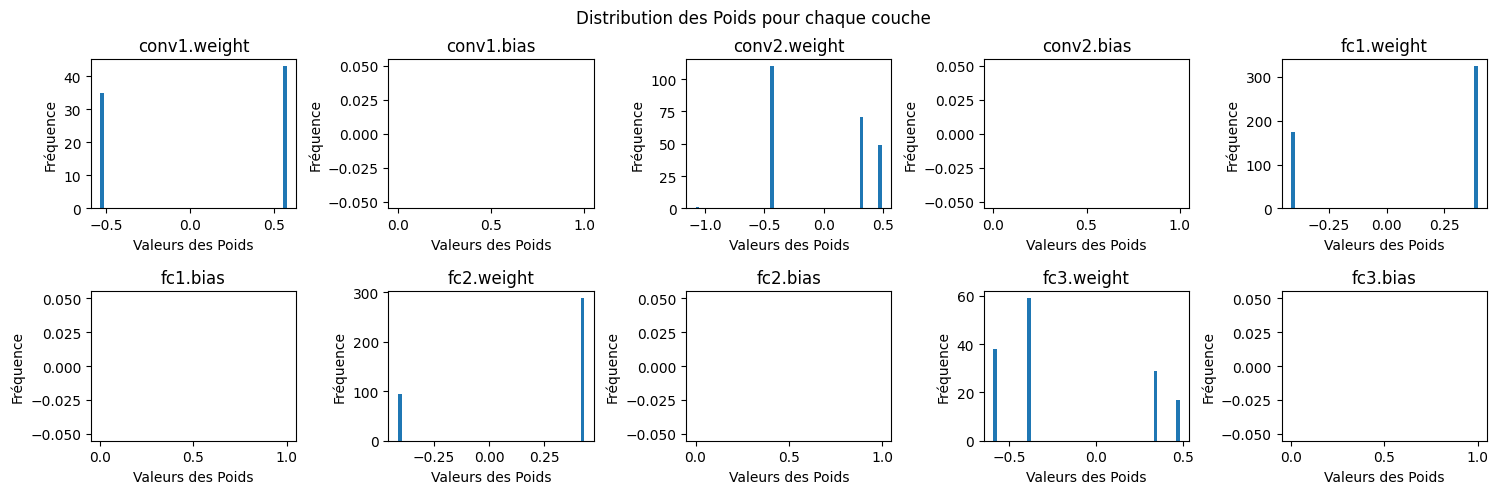

In [ ]:
print_weights(net_pruned_quantized)

Les matrices de poids sont quasiment vides ! Si l'on fait les comptes, on a seulement 14 poids différents non nuls dans tous le réseau !

Nous réentraînons ensuite le réseau pour améliorer sa précision.

In [ ]:
%%time
optimizer = optim.Adam(net_pruned_quantized.parameters(), lr=0.001)
retrain_on_weight_shared(net=net_pruned_quantized, optimizer=optimizer, n_epoch=3, scheduler=None)

Époque 1/3: 100%|██████████| 938/938 [00:20<00:00, 45.13it/s, loss=0.152]


Sur 60000 images de test: Précision = 95.255%, Perte moyenne par image = 0.144
Sur 10000 images de test: Précision = 95.070%, Perte moyenne par image = 0.160


Époque 2/3: 100%|██████████| 938/938 [00:21<00:00, 43.66it/s, loss=0.144]


Sur 60000 images de test: Précision = 95.357%, Perte moyenne par image = 0.144
Sur 10000 images de test: Précision = 95.170%, Perte moyenne par image = 0.159


Époque 3/3: 100%|██████████| 938/938 [00:21<00:00, 43.50it/s, loss=0.143]


Sur 60000 images de test: Précision = 95.365%, Perte moyenne par image = 0.143
Sur 10000 images de test: Précision = 95.130%, Perte moyenne par image = 0.160
Entraînement terminé
CPU times: user 1min 50s, sys: 700 ms, total: 1min 51s
Wall time: 1min 55s


(95.13, 0.160404651984869, 95.365, 0.14306108382091656)

Après réentraînement sur 3 époques, on obtient une précision de l'ordre de 95%, on a regagné 3% de précsion par rapport au modèle obtenu à l'issue de la quantisation (avant réentraînement).

On ne revient pas à la précision initiale de 98%, peut être avons nous été un peu trop agressif ou glouton 😋.

On peut afficher les poids finaux obtenus à l'issu du réentraînement. Si l'on est attentif, on peut voir que certains poids se sont déplacés, mais le nombre de poids différents est bien entendu toujours le même.

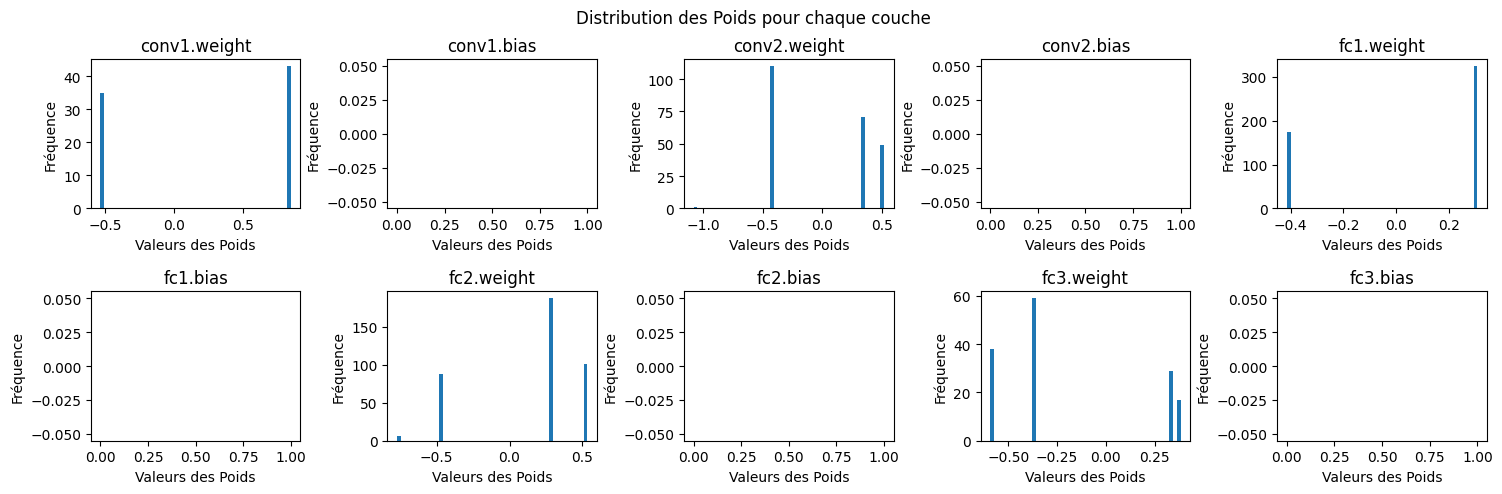

In [ ]:
print_weights(net_pruned_quantized)

### 3.2 Discussion sur la méthode d'initialisation des centroïdes

Comme expliqué dans l'introduction de cette partie 3, l'inialisation des centroïdes est une question que l'on est légitime de se poser. On explorera dans cette partie, 3 types d'initialisation:

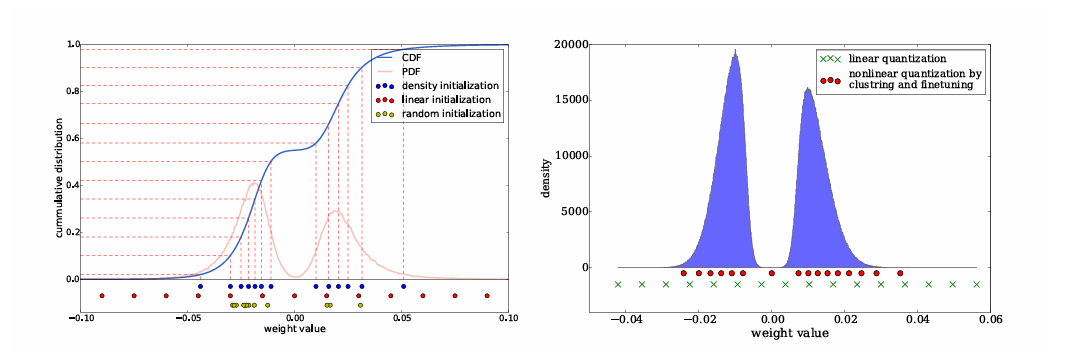

**`Figure 6: Répartitions des poids pour l'initialisation selon différentes techniques sur la couche convolutionnelle 3 d'AlexNet.`**


- **L'initialisation Forgy (aléatoire)** choisit aléatoirement k observations dans l'ensemble de données et utilise celles-ci comme centroïdes initiaux. Les centroïdes initialisés sont montrés en vert pâle. Puisqu'il y a deux pics dans la distribution bimodale, la méthode Forgy tend à se concentrer autour de ces deux pics.

- **L'initialisation basée sur la densité** espace linéairement la CDF des poids sur l'axe des y, puis trouve l'intersection horizontale avec la CDF, et finalement trouve l'intersection verticale sur l'axe des x, qui devient un centroïde, comme montré en points bleus. Cette méthode rend les centroïdes plus denses autour des deux pics, mais plus dispersés que la méthode Forgy.

- **L'initialisation linéaire** espace linéairement les centroïdes entre le [min, max] des poids originaux. Cette méthode d'initialisation est invariante à la distribution des poids et est la plus dispersée comparée aux deux méthodes précédentes.

Les poids plus grands jouent un rôle plus important que les poids plus petits, mais ils sont moins nombreux. Ainsi, pour l'initialisation Forgy et l'initialisation basée sur la densité, très peu de centroïdes ont une grande valeur absolue, ce qui résulte en une mauvaise représentation de ces quelques poids importants. L'initialisation linéaire ne souffre pas de ce problème. Ci dessous, nous comparons la précision des différentes méthodes d'initialisation après le clustering et le réentraînement.

*Note: Pour avoir une indication sur le taux de quantisation global, on sommera le nombre de poids différents sur l'ensemble du réseau $N_{weights} = \sum\limits_{i=1}^{k}2^{bits_i}$ avec $i$ le numéro de la couche et $k$ le nombre de couche (ici 5).*

In [38]:
""" CELLULE FACULTATIVE """
# Choix de la méthode d'initialisation des centroïdes avant le k-mean
%%time
weight_inits = ['linear', 'random', 'density']
bits_dict = {'conv1': (2, 0), 'conv2': (2, 0), 'fc1': (2, 0), 'fc2': (2, 0), 'fc3': (2, 0)}

scores_weight_sharing_methods = []

for weight_init in weight_inits:
  net_pruned_quantized = deepcopy(net_pruned)
  bit_size_list = apply_weight_sharing(net_pruned_quantized, bits=bits_dict, bias=True)
  print(bit_size_list)
  bite_size = sum(element[1] for element in bit_size_list)
  print(f'--- Partage des poids avec la méthode d\'initialisation : {weight_init}, nombre poids non nuls différents : {bite_size}')
  test(net_pruned_quantized, trainloader)
  test(net_pruned_quantized, testloader)
  optimizer = optim.Adam(net_pruned_quantized.parameters(), lr=0.0005)
  score = retrain_on_weight_shared(net=net_pruned_quantized, optimizer=optimizer, n_epoch=1, scheduler=None)
  scores_weight_sharing_methods.append(score)
  print(f'\n')

[('conv1_weight', 4), ('conv1_bias', 0), ('conv2_weight', 4), ('conv2_bias', 0), ('fc1_weight', 4), ('fc1_bias', 0), ('fc2_weight', 4), ('fc2_bias', 0), ('fc3_weight', 4), ('fc3_bias', 0)]
--- Partage des poids avec la méthode d'initialisation : linear, nombre poids non nuls différents : 20
Sur 60000 images de test: Précision = 97.647%, Perte moyenne par image = 0.072
Sur 10000 images de test: Précision = 97.290%, Perte moyenne par image = 0.086


Époque 1/1: 100%|██████████| 938/938 [00:25<00:00, 36.66it/s, loss=0.0568]


Sur 60000 images de test: Précision = 98.247%, Perte moyenne par image = 0.055
Sur 10000 images de test: Précision = 97.840%, Perte moyenne par image = 0.064
Entraînement terminé


[('conv1_weight', 4), ('conv1_bias', 0), ('conv2_weight', 4), ('conv2_bias', 0), ('fc1_weight', 4), ('fc1_bias', 0), ('fc2_weight', 4), ('fc2_bias', 0), ('fc3_weight', 4), ('fc3_bias', 0)]
--- Partage des poids avec la méthode d'initialisation : random, nombre poids non nuls différents : 20
Sur 60000 images de test: Précision = 97.647%, Perte moyenne par image = 0.072
Sur 10000 images de test: Précision = 97.290%, Perte moyenne par image = 0.086


Époque 1/1: 100%|██████████| 938/938 [00:22<00:00, 40.94it/s, loss=0.057]


Sur 60000 images de test: Précision = 98.242%, Perte moyenne par image = 0.055
Sur 10000 images de test: Précision = 97.840%, Perte moyenne par image = 0.064
Entraînement terminé


[('conv1_weight', 4), ('conv1_bias', 0), ('conv2_weight', 4), ('conv2_bias', 0), ('fc1_weight', 4), ('fc1_bias', 0), ('fc2_weight', 4), ('fc2_bias', 0), ('fc3_weight', 4), ('fc3_bias', 0)]
--- Partage des poids avec la méthode d'initialisation : density, nombre poids non nuls différents : 20
Sur 60000 images de test: Précision = 97.647%, Perte moyenne par image = 0.072
Sur 10000 images de test: Précision = 97.290%, Perte moyenne par image = 0.086


Époque 1/1: 100%|██████████| 938/938 [00:28<00:00, 32.42it/s, loss=0.0566]


Sur 60000 images de test: Précision = 98.225%, Perte moyenne par image = 0.055
Sur 10000 images de test: Précision = 97.860%, Perte moyenne par image = 0.064
Entraînement terminé


CPU times: user 2min 51s, sys: 928 ms, total: 2min 52s
Wall time: 3min 6s


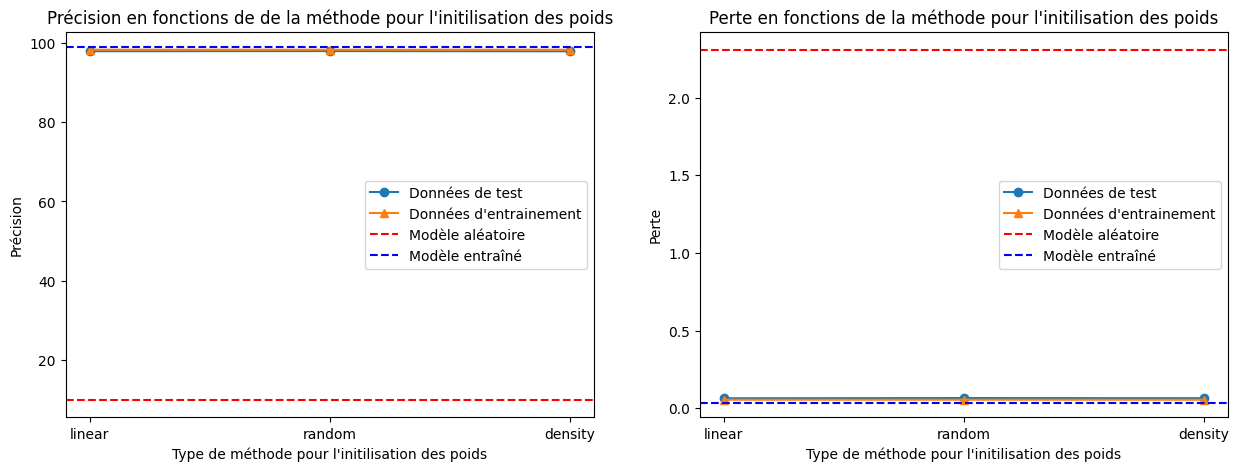

In [ ]:
""" CELLULE FACULTATIVE """
print_scores(weight_inits, scores_weight_sharing_methods,
             x_label='Type de méthode pour l\'initilisation des poids',
             title='de la méthode pour l\'initilisation des poids')

On observe pas vraiment de différence entre les 3 méthodes, cela est en fait dû au très faible nombre de cluster par couche. Pour un nombre de cluster plus grand, on aurait trouvé que la méthode linéaire donnerait de meilleur résulats.

### 3.3 Exploration de différents taux de quantisation (nombre des centroïdes par couches)

Dans cette partie nous explorons différents taux de quantisation (différents nombre de clusters), pour voir jusqu'à où nous pouvons pousser le vice de réduire la taille du modèle sans entacher sa précision.

In [41]:
""" CELLULE FACULTATIVE """
# Différente taux de quantisation
%%time
weight_init = 'linear'
bits_dict_list = [{'conv1': (3, 0), 'conv2': (4, 0), 'fc1': (4, 0), 'fc2': (4, 0), 'fc3': (4, 0)},
                  {'conv1': (2, 0), 'conv2': (3, 0), 'fc1': (3, 0), 'fc2': (3, 0), 'fc3': (3, 0)},
                  {'conv1': (2, 0), 'conv2': (2, 0), 'fc1': (2, 0), 'fc2': (2, 0), 'fc3': (2, 0)},
                  {'conv1': (1, 0), 'conv2': (2, 0), 'fc1': (1, 0), 'fc2': (1, 0), 'fc3': (2, 0)},
                  {'conv1': (1, 0), 'conv2': (1, 0), 'fc1': (1, 0), 'fc2': (1, 0), 'fc3': (1, 0)},
                  {'conv1': (1, 0), 'conv2': (1, 0), 'fc1': (0, 0), 'fc2': (1, 0), 'fc3': (1, 0)},
                  {'conv1': (0, 0), 'conv2': (1, 0), 'fc1': (0, 0), 'fc2': (1, 0), 'fc3': (1, 0)},
                  {'conv1': (0, 0), 'conv2': (0, 0), 'fc1': (0, 0), 'fc2': (0, 0), 'fc3': (0, 0)}]

scores_weight_sharing_rates = []
bit_sizes = []

for bits_dict in bits_dict_list:
  net_pruned_quantized = deepcopy(net_pruned)
  bit_size_list = apply_weight_sharing(net_pruned_quantized, bits=bits_dict, bias=True)
  bit_sizes.append(sum(element[1] for element in bit_size_list))
  print(f'--- Compression avec un nombre poids non nuls différents : {bit_sizes[-1]}')
  test(net_pruned_quantized, trainloader)
  test(net_pruned_quantized, testloader)
  optimizer = optim.Adam(net_pruned_quantized.parameters(), lr=0.001)
  score = retrain_on_weight_shared(net=net_pruned_quantized, optimizer=optimizer, n_epoch=1, scheduler=None)
  scores_weight_sharing_rates.append(score)
  print(f'\n')

--- Compression avec un nombre poids non nuls différents : 72
Sur 60000 images de test: Précision = 99.045%, Perte moyenne par image = 0.030
Sur 10000 images de test: Précision = 98.480%, Perte moyenne par image = 0.046


Époque 1/1: 100%|██████████| 938/938 [00:38<00:00, 24.33it/s, loss=0.0284]


Sur 60000 images de test: Précision = 99.100%, Perte moyenne par image = 0.028
Sur 10000 images de test: Précision = 98.560%, Perte moyenne par image = 0.046
Entraînement terminé


--- Compression avec un nombre poids non nuls différents : 36
Sur 60000 images de test: Précision = 98.727%, Perte moyenne par image = 0.039
Sur 10000 images de test: Précision = 98.210%, Perte moyenne par image = 0.054


Époque 1/1: 100%|██████████| 938/938 [00:28<00:00, 33.22it/s, loss=0.0345]


Sur 60000 images de test: Précision = 98.923%, Perte moyenne par image = 0.033
Sur 10000 images de test: Précision = 98.480%, Perte moyenne par image = 0.048
Entraînement terminé


--- Compression avec un nombre poids non nuls différents : 20
Sur 60000 images de test: Précision = 97.647%, Perte moyenne par image = 0.072
Sur 10000 images de test: Précision = 97.290%, Perte moyenne par image = 0.086


Époque 1/1: 100%|██████████| 938/938 [00:23<00:00, 40.46it/s, loss=0.056]


Sur 60000 images de test: Précision = 98.207%, Perte moyenne par image = 0.055
Sur 10000 images de test: Précision = 97.870%, Perte moyenne par image = 0.066
Entraînement terminé


--- Compression avec un nombre poids non nuls différents : 14
Sur 60000 images de test: Précision = 92.755%, Perte moyenne par image = 0.253
Sur 10000 images de test: Précision = 92.380%, Perte moyenne par image = 0.293


Époque 1/1: 100%|██████████| 938/938 [00:21<00:00, 43.83it/s, loss=0.154]


Sur 60000 images de test: Précision = 95.263%, Perte moyenne par image = 0.144
Sur 10000 images de test: Précision = 94.980%, Perte moyenne par image = 0.161
Entraînement terminé


--- Compression avec un nombre poids non nuls différents : 10
Sur 60000 images de test: Précision = 90.567%, Perte moyenne par image = 0.351
Sur 10000 images de test: Précision = 90.120%, Perte moyenne par image = 0.393


Époque 1/1: 100%|██████████| 938/938 [00:20<00:00, 46.14it/s, loss=0.24]


Sur 60000 images de test: Précision = 92.297%, Perte moyenne par image = 0.232
Sur 10000 images de test: Précision = 91.960%, Perte moyenne par image = 0.252
Entraînement terminé


--- Compression avec un nombre poids non nuls différents : 9
Sur 60000 images de test: Précision = 18.352%, Perte moyenne par image = 5.308
Sur 10000 images de test: Précision = 18.590%, Perte moyenne par image = 5.297


Époque 1/1: 100%|██████████| 938/938 [00:18<00:00, 50.11it/s, loss=2.54]


Sur 60000 images de test: Précision = 15.757%, Perte moyenne par image = 2.253
Sur 10000 images de test: Précision = 16.350%, Perte moyenne par image = 2.252
Entraînement terminé


--- Compression avec un nombre poids non nuls différents : 8
Sur 60000 images de test: Précision = 7.545%, Perte moyenne par image = 2.392
Sur 10000 images de test: Précision = 7.660%, Perte moyenne par image = 2.396


Époque 1/1: 100%|██████████| 938/938 [00:18<00:00, 50.11it/s, loss=2.31]


Sur 60000 images de test: Précision = 11.557%, Perte moyenne par image = 2.300
Sur 10000 images de test: Précision = 11.840%, Perte moyenne par image = 2.299
Entraînement terminé


--- Compression avec un nombre poids non nuls différents : 5
Sur 60000 images de test: Précision = 9.872%, Perte moyenne par image = 2.303
Sur 10000 images de test: Précision = 9.800%, Perte moyenne par image = 2.303


Époque 1/1: 100%|██████████| 938/938 [00:18<00:00, 51.23it/s, loss=2.3]


Sur 60000 images de test: Précision = 9.872%, Perte moyenne par image = 2.303
Sur 10000 images de test: Précision = 9.800%, Perte moyenne par image = 2.303
Entraînement terminé


CPU times: user 7min 12s, sys: 2.05 s, total: 7min 14s
Wall time: 7min 18s


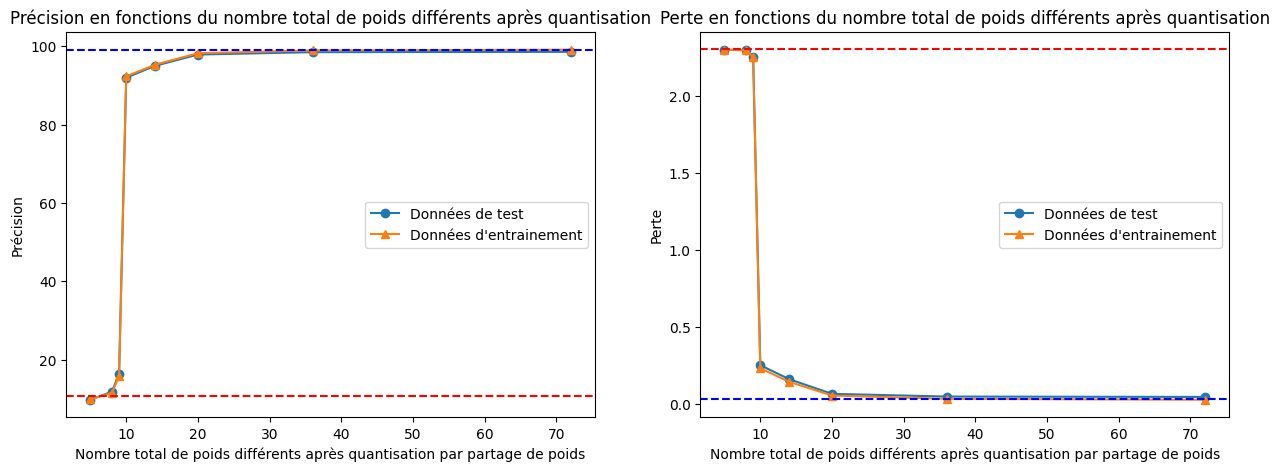

In [42]:
""" CELLULE FACULTATIVE """
print_scores(bit_sizes, scores_weight_sharing_rates,
             x_label='Nombre total de poids différents après quantisation par partage de poids',
             title='du nombre total de poids différents après quantisation')

### 3.4 Quantification itérative

Dans cette partie nous explorons la quantification itérative (comme nous avion fait dans la partie précédente). Nous appliquons le partage de poids de façon progressive suivi à chaque étape d'un réentraînement, puis quantisation plus forte, puis réentraînement...

In [43]:
""" CELLULE FACULTATIVE """
# Différente taux de quantisation
%%time
weight_init = 'linear'
bits_dict_list = [{'conv1': (3, 0), 'conv2': (4, 0), 'fc1': (4, 0), 'fc2': (4, 0), 'fc3': (4, 0)},
                  {'conv1': (2, 0), 'conv2': (3, 0), 'fc1': (3, 0), 'fc2': (3, 0), 'fc3': (3, 0)},
                  {'conv1': (2, 0), 'conv2': (2, 0), 'fc1': (2, 0), 'fc2': (2, 0), 'fc3': (2, 0)},
                  {'conv1': (1, 0), 'conv2': (2, 0), 'fc1': (1, 0), 'fc2': (1, 0), 'fc3': (2, 0)},
                  {'conv1': (1, 0), 'conv2': (1, 0), 'fc1': (1, 0), 'fc2': (1, 0), 'fc3': (1, 0)},
                  {'conv1': (1, 0), 'conv2': (1, 0), 'fc1': (0, 0), 'fc2': (1, 0), 'fc3': (1, 0)},
                  {'conv1': (0, 0), 'conv2': (1, 0), 'fc1': (0, 0), 'fc2': (1, 0), 'fc3': (1, 0)},
                  {'conv1': (0, 0), 'conv2': (0, 0), 'fc1': (0, 0), 'fc2': (0, 0), 'fc3': (0, 0)}]

scores_weight_sharing_rates_iterative = []
bit_sizes = []

net_pruned_quantized = deepcopy(net_pruned)

for bits_dict in bits_dict_list:
  bit_size_list = apply_weight_sharing(net_pruned_quantized, bits=bits_dict, bias=True)
  bit_sizes.append(sum(element[1] for element in bit_size_list))
  print(f'--- Compression avec un nombre de poids différents : {bit_sizes[-1]}')
  test(net_pruned_quantized, trainloader)
  test(net_pruned_quantized, testloader)
  optimizer = optim.Adam(net_pruned_quantized.parameters(), lr=0.001)
  score = retrain_on_weight_shared(net=net_pruned_quantized, optimizer=optimizer, n_epoch=1, scheduler=None)
  scores_weight_sharing_rates_iterative.append(score)
  print(f'\n')

--- Compression avec un nombre de poids différents : 72
Sur 60000 images de test: Précision = 99.045%, Perte moyenne par image = 0.030
Sur 10000 images de test: Précision = 98.480%, Perte moyenne par image = 0.046


Époque 1/1: 100%|██████████| 938/938 [00:38<00:00, 24.61it/s, loss=0.0283]


Sur 60000 images de test: Précision = 99.078%, Perte moyenne par image = 0.028
Sur 10000 images de test: Précision = 98.490%, Perte moyenne par image = 0.047
Entraînement terminé


--- Compression avec un nombre de poids différents : 36
Sur 60000 images de test: Précision = 98.573%, Perte moyenne par image = 0.042
Sur 10000 images de test: Précision = 98.090%, Perte moyenne par image = 0.063


Époque 1/1: 100%|██████████| 938/938 [00:27<00:00, 34.44it/s, loss=0.0364]


Sur 60000 images de test: Précision = 98.800%, Perte moyenne par image = 0.035
Sur 10000 images de test: Précision = 98.240%, Perte moyenne par image = 0.055
Entraînement terminé


--- Compression avec un nombre de poids différents : 20
Sur 60000 images de test: Précision = 97.438%, Perte moyenne par image = 0.079
Sur 10000 images de test: Précision = 97.010%, Perte moyenne par image = 0.098


Époque 1/1: 100%|██████████| 938/938 [00:22<00:00, 41.50it/s, loss=0.0662]


Sur 60000 images de test: Précision = 97.865%, Perte moyenne par image = 0.065
Sur 10000 images de test: Précision = 97.560%, Perte moyenne par image = 0.081
Entraînement terminé


--- Compression avec un nombre de poids différents : 14
Sur 60000 images de test: Précision = 93.182%, Perte moyenne par image = 0.224
Sur 10000 images de test: Précision = 92.900%, Perte moyenne par image = 0.240


Époque 1/1: 100%|██████████| 938/938 [00:21<00:00, 44.58it/s, loss=0.158]


Sur 60000 images de test: Précision = 95.130%, Perte moyenne par image = 0.150
Sur 10000 images de test: Précision = 94.670%, Perte moyenne par image = 0.168
Entraînement terminé


--- Compression avec un nombre de poids différents : 10
Sur 60000 images de test: Précision = 92.108%, Perte moyenne par image = 0.242
Sur 10000 images de test: Précision = 91.480%, Perte moyenne par image = 0.263


Époque 1/1: 100%|██████████| 938/938 [00:20<00:00, 46.77it/s, loss=0.232]


Sur 60000 images de test: Précision = 92.457%, Perte moyenne par image = 0.231
Sur 10000 images de test: Précision = 91.970%, Perte moyenne par image = 0.246
Entraînement terminé


--- Compression avec un nombre de poids différents : 9
Sur 60000 images de test: Précision = 18.940%, Perte moyenne par image = 2.853
Sur 10000 images de test: Précision = 19.270%, Perte moyenne par image = 2.851


Époque 1/1: 100%|██████████| 938/938 [00:18<00:00, 51.23it/s, loss=2.27]


Sur 60000 images de test: Précision = 19.163%, Perte moyenne par image = 2.224
Sur 10000 images de test: Précision = 19.650%, Perte moyenne par image = 2.224
Entraînement terminé


--- Compression avec un nombre de poids différents : 8
Sur 60000 images de test: Précision = 7.495%, Perte moyenne par image = 2.307
Sur 10000 images de test: Précision = 7.400%, Perte moyenne par image = 2.307


Époque 1/1: 100%|██████████| 938/938 [00:17<00:00, 52.32it/s, loss=2.3]


Sur 60000 images de test: Précision = 11.845%, Perte moyenne par image = 2.300
Sur 10000 images de test: Précision = 12.080%, Perte moyenne par image = 2.300
Entraînement terminé


--- Compression avec un nombre de poids différents : 5
Sur 60000 images de test: Précision = 9.872%, Perte moyenne par image = 2.303
Sur 10000 images de test: Précision = 9.800%, Perte moyenne par image = 2.303


Époque 1/1: 100%|██████████| 938/938 [00:17<00:00, 54.89it/s, loss=2.3]


Sur 60000 images de test: Précision = 9.872%, Perte moyenne par image = 2.303
Sur 10000 images de test: Précision = 9.800%, Perte moyenne par image = 2.303
Entraînement terminé


CPU times: user 7min, sys: 1.92 s, total: 7min 2s
Wall time: 7min 5s


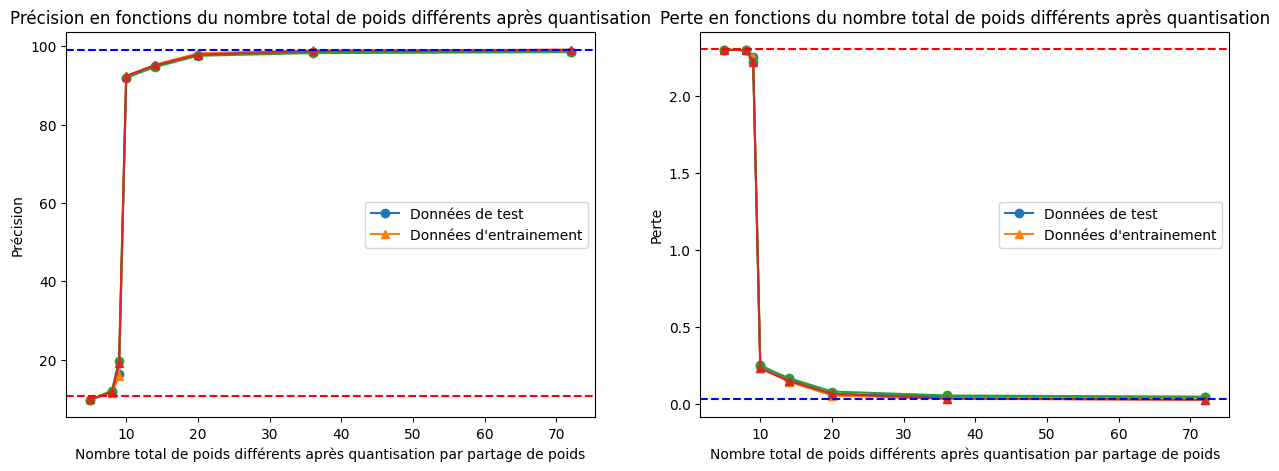

In [59]:
""" CELLULE FACULTATIVE """
print_scores(bit_sizes, scores_weight_sharing_rates,
             x_label='Nombre total de poids différents après quantisation par partage de poids',
             title='du nombre total de poids différents après quantisation',
             scores_bis=scores_weight_sharing_rates_iterative, scores_bis_label_prefix='avec itération'
             )

On observe pas vraiment de différence avec la méthode non-itérative, peut être du au très faible nombre de clusters par couche.

### 3.5 Application du meilleur parametrage de partage de poids trouvé

Dans cette partie nous quantifions le modèle avec la meilleur paramétrisation trouvée qui réduit au plus le nombre de poids différents en conservant la précision initiale du modèle.

In [45]:
# Meilleur quantisation trouvée
%%time
weight_init = 'linear'
bits_dict = {'conv1': (2, 0), 'conv2': (2, 0), 'fc1': (2, 0), 'fc2': (2, 0), 'fc3': (3, 0)}


net_pruned_quantized = deepcopy(net_pruned)
bit_size_list = apply_weight_sharing(net_pruned_quantized, bits=bits_dict, weight_init = 'linear', bias=True)
bit_size = sum(element[1] for element in bit_size_list)
print(f'--- Compression avec un nombre de poids différents : {bit_size}')
test(net_pruned_quantized, trainloader)
test(net_pruned_quantized, testloader)
optimizer = optim.Adam(net_pruned_quantized.parameters(), lr=0.0002)
scheduler = StepLR(optimizer, step_size=1, gamma=0.5)
score = retrain_on_weight_shared(net=net_pruned_quantized, optimizer=optimizer, n_epoch=1, scheduler=None)
net_pruned_quantized_accuracy_test, net_pruned_quantized_loss_test, net_pruned_quantized_accuracy_train, net_pruned_quantized_loss_train = score


--- Compression avec un nombre de poids différents : 24
Sur 60000 images de test: Précision = 97.675%, Perte moyenne par image = 0.070
Sur 10000 images de test: Précision = 97.250%, Perte moyenne par image = 0.084


Époque 1/1: 100%|██████████| 938/938 [00:23<00:00, 40.50it/s, loss=0.054]


Sur 60000 images de test: Précision = 98.415%, Perte moyenne par image = 0.049
Sur 10000 images de test: Précision = 97.970%, Perte moyenne par image = 0.060
Entraînement terminé
CPU times: user 52.9 s, sys: 264 ms, total: 53.2 s
Wall time: 53.5 s


On réatteint les 98% de précision avec un modèle quantifié et élagué.

In [46]:
path = 'LeNetTrainedPrunedQuantized.pth'
save_model(model=net_pruned_quantized, path=path)

### 3.6 Bilan sur le partage de poids

**`Cellule checkpoint:`** Décommenter cette cellule pour accéder au modèle élagué et quantifié si vous n'avez pas eu le temps d'entraîner le modèle final.

In [11]:
path = 'LeNetTrainedPrunedQuantized.pth'
state_dict = torch.load(path, map_location=torch.device(device))
net_pruned_quantized = LeNet()
net_pruned_quantized.load_state_dict(state_dict)
net_pruned_quantized.to(device)

net_pruned_quantized_accuracy_train, net_pruned_quantized_loss_train = test(net_pruned_quantized, trainloader)
net_pruned_quantized_accuracy_test, net_pruned_quantized_loss_test = test(net_pruned_quantized, testloader)

Sur 60000 images de test: Précision = 98.415%, Perte moyenne par image = 0.049
Sur 10000 images de test: Précision = 97.970%, Perte moyenne par image = 0.060


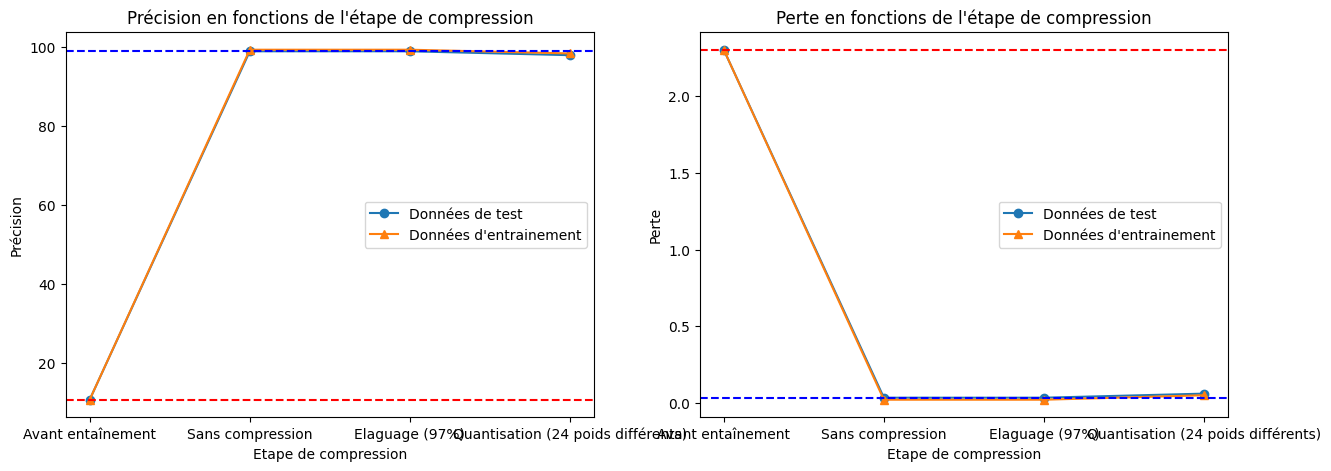

In [48]:
compression_state = ['Avant entaînement', 'Sans compression', 'Elaguage (97%)', 'Quantisation (24 poids différents)']
scores = [(accuracy_random, loss_random, accuracy_random, loss_random),
          (net_accuracy_test, net_loss_test, net_accuracy_train, net_loss_train),
          (net_pruned_accuracy_test, net_pruned_loss_test, net_pruned_accuracy_train, net_pruned_loss_train),
          (net_pruned_quantized_accuracy_test, net_pruned_quantized_loss_test, net_pruned_quantized_accuracy_train, net_pruned_quantized_loss_train)]

print_scores(compression_state, scores,
             x_label='Etape de compression',
             title='de l\'étape de compression',
             )

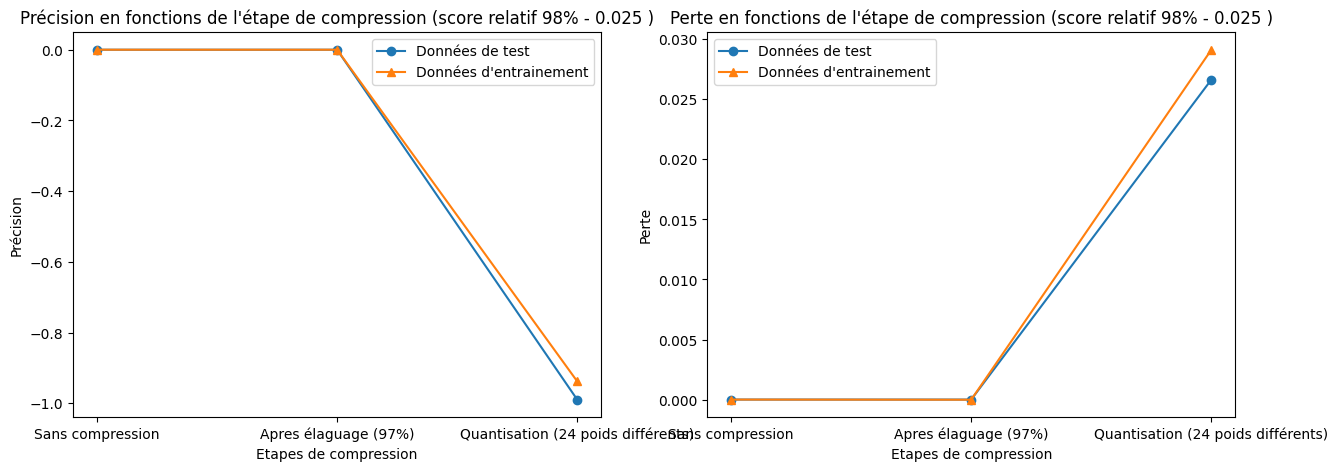

In [49]:
compression_state = ['Sans compression', 'Apres élaguage (97%)',  'Quantisation (24 poids différents)']
scores = [(0,0,0,0),
          (net_pruned_accuracy_test-net_accuracy_test, net_pruned_loss_test-net_loss_test, net_pruned_accuracy_train-net_accuracy_train, net_pruned_loss_train-net_loss_train),
          (net_pruned_quantized_accuracy_test-net_accuracy_test, net_pruned_quantized_loss_test-net_loss_test, net_pruned_quantized_accuracy_train-net_accuracy_train, net_pruned_quantized_loss_train-net_loss_train)]

print_scores(compression_state, scores,
             x_label='Etapes de compression',
             title='de l\'étape de compression (score relatif 98% - 0.025 )',
             random_baseline=False,
             train_baseline=False
             )

On observe la perte en précsion après cette étape de quantisation. La baisse est minime.

## 4. Codage Huffman

Pour compresser efficacement le modèle, nous mettrons en œuvre le codage Huffman, une technique de compression de données sans perte qui est particulièrement efficace pour réduire la taille des modèles en exploitant la fréquence d'apparition des éléments (par exemple, les poids dans un modèle de réseau de neurones).

Le codage Huffman fonctionne en créant un arbre binaire de codes, où chaque feuille de l'arbre représente un élément unique dans le modèle, et le chemin de la racine à la feuille définit le code binaire de cet élément. Les éléments les plus fréquents reçoivent les codes binaires les plus courts, tandis que les éléments moins fréquents se voient attribuer des codes plus longs. Ce processus commence par la construction d'une table de fréquence pour tous les éléments, puis, en utilisant cette table, les éléments sont assemblés deux par deux, en commençant par les moins fréquents, pour construire progressivement l'arbre. Chaque paire d'éléments forme un nouveau nœud dans l'arbre, dont la fréquence est la somme des fréquences de ses éléments. Ce processus se répète jusqu'à ce que l'arbre soit complet, et le modèle est alors compressé en remplaçant chaque élément par son code Huffman correspondant.

Cette méthode de compression est particulièrement avantageuse pour les modèles de grande taille qui partagent un certain nombre de poids.

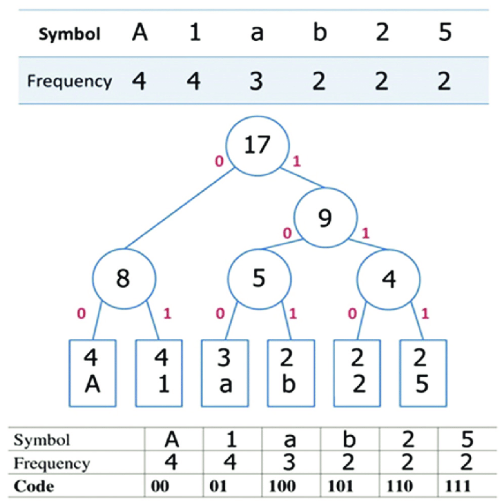

**`Figure 7: Schéma explicatif de la construction de l'arbre pour le codage Huffman.`**

**`Sommaire de la partie`**:
- **4.0** Implémentation du problème
- **4.1** Application de l'encodage Huffman sur le réseau `LeNet` élagué et quantifié.
- **4.2** Bilan sur l'encodage Huffman.

### 4.0 Implémentation du problème

Dans cette partie nous définissons toutes les fonctions qui permettrons de réaliser le codage Huffman.

On convertit chaque tenseur de poids/biais en un tenseur sparse de pytorch. Un tenseur sparse, contient deux sous tenseurs:
- un tenseur de valeurs qui contient toutes les valeurs non nulles toutes en lignes
- un tenseur d'index contenant les indices des éléments non nuls. Si le tenseur original a n dimensions, alors le tenseur d'indices aura deux dimensions, où la première dimension est n et la seconde dimension est égale au nombre d'éléments non nuls. Chaque colonne de ce tenseur représente les coordonnées d'un élément non nul dans le tenseur d'origine.

Pour chacun de ces sous tenseurs obtenus, on génère l'arbre et le code Huffman correspond.

On enregistre les arbres et codes Huffman obtenus dans des fichiers encodés sur 8 bits. Un fichier par code et un par arbre.

On définit ensuite les fonctions pour recharger ces arbres et codes et replacer les poids dans un modèle vide.

**🖊🧑 Exercice:** Déterminer le nombre de d'arbres et de codes Huffman totaux pour tout le modèle.

**☝  Solution:**  <details class="alert alert-danger">
    <summary markdown="span"><b>Prêt à voir la solution </b></summary>

Chaque couche contient un tenseur de biais et un tenseur de poids. Chaque tenseur est transformé en tenseur sparse qui contient donc un tenseur d'indice et un tenseur de valeurs. pour chacun de ces sous-tenseur on a un arbre et un code huffman. On a 5 couches donc:
$N_{arbre} = N_{codes} =  N_{couches} * N_{tenseur.par.couche} * N_{sous.tenseur}= 5 * 2 * 2 = 20$

On aura donc 20 sous fichiers pour les arbres et 20 pour les codes.

</details>

In [12]:
class HuffmanNode:
    def __init__(self, value, freq):
        self.value = value
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def calculate_frequencies(tensor):
    # Convertit le tensor PyTorch en numpy array pour calculer les fréquences
    values, counts = tensor.flatten().unique(return_counts=True)
    # Convertit les valeurs et les comptes en numpy pour être utilisé avec le reste du code
    values = values.cpu().numpy()
    counts = counts.cpu().numpy()
    return dict(zip(values, counts))

def build_huffman_tree(frequencies):
    priority_queue = [HuffmanNode(value, freq) for value, freq in frequencies.items()]
    heapq.heapify(priority_queue)
    while len(priority_queue) > 1:
        left = heapq.heappop(priority_queue)
        right = heapq.heappop(priority_queue)
        merged = HuffmanNode(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(priority_queue, merged)
    if len(priority_queue) == 0:
      return None
    return priority_queue[0]

def generate_codes(node, prefix="", code_dict=None):
    if node == None:
      return {}
    if code_dict is None:
        code_dict = {}
    if node.value is not None:
        code_dict[node.value] = prefix
    else:
        generate_codes(node.left, prefix + "0", code_dict)
        generate_codes(node.right, prefix + "1", code_dict)
    return code_dict

def huffman_coding_for_pytorch_model(model):
    huffman_codes = {}
    trees = {}
    for name, param in model.named_parameters():
        if param.requires_grad:  # Ignorer les paramètres qui ne nécessitent pas de gradient
            # Convertir le tensor en une matrice sparse
            tensor = param.data
            sparse_tensor = tensor.to_sparse()
            values = sparse_tensor.values()
            indices = sparse_tensor.indices().t()  # Transformer pour calculer les fréquences par ligne

            # Calculer les fréquences pour les valeurs et les indices
            value_frequencies = calculate_frequencies(values)
            index_frequencies = calculate_frequencies(indices)

            # Construire des arbres de Huffman pour les valeurs et les indices
            value_tree = build_huffman_tree(value_frequencies)
            index_tree = build_huffman_tree(index_frequencies)

            # Générer des codes Huffman pour les valeurs et les indices
            value_codes = generate_codes(value_tree)
            index_codes = generate_codes(index_tree)

            # Stocker les codes et les arbres
            huffman_codes[name] = {'values': value_codes, 'indices': index_codes}
            trees[name] = {'value_tree': value_tree, 'index_tree': index_tree}
    return huffman_codes, trees

In [13]:
# Sauvegarde et encodage des arbres

def serialize_huffman_tree(node, bitstring=''):
    if node is None:
        return bitstring
    # Nœud feuille
    if node.left is None and node.right is None:
        bitstring += '1'  # Marqueur de nœud feuille
        # Utilise struct pour gérer les nombres flottants
        float_bytes = struct.pack('>f', node.value)  # '>f' pour float en big-endian
        for byte in float_bytes:
            bitstring += format(byte, '08b')
    else:
        bitstring += '0'  # Marqueur de nœud interne
        bitstring = serialize_huffman_tree(node.left, bitstring)
        bitstring = serialize_huffman_tree(node.right, bitstring)
    return bitstring

def bitstring_to_bytes(bitstring):
    padding = (8 - len(bitstring) % 8) % 8
    bitstring += '0' * padding
    bytes_array = bytearray()
    for i in range(0, len(bitstring), 8):
        byte = bitstring[i:i+8]
        bytes_array.append(int(byte, 2))
    return bytes_array, padding

def save_huffman_tree_to_file(trees, prefix):
  folder_path = 'encodings/trees/'
  os.makedirs(folder_path, exist_ok=True)
  for name, sub_trees in trees.items():
    value_tree = sub_trees['value_tree']
    index_tree = sub_trees['index_tree']
    bitstring_value = serialize_huffman_tree(value_tree)
    bitstring_index = serialize_huffman_tree(index_tree)
    bytes_array_value, padding_value = bitstring_to_bytes(bitstring_value)
    bytes_array_index, padding_index = bitstring_to_bytes(bitstring_index)
    # Écrire les bytes dans le fichier, précédé par un octet indiquant le padding
    with open(f'{folder_path}{prefix}_{name}_values', 'wb') as file:
        file.write(bytes([padding_value]))  # Stocker le padding dans le premier octet
        file.write(bytes_array_value)
    with open(f'{folder_path}{prefix}_{name}_indices', 'wb') as file:
        file.write(bytes([padding_index]))  # Stocker le padding dans le premier octet
        file.write(bytes_array_index)

In [14]:
# Chargement des arbres

def bytes_to_bitstring(bytes_array):
    bitstring = ''.join(format(byte, '08b') for byte in bytes_array)
    return bitstring

def deserialize_huffman_tree(bitstring, index=0):
    if index >= len(bitstring):
        return None, index

    node_type = bitstring[index]
    index += 1

    if node_type == '1':  # Nœud feuille
        # Lire 32 bits pour une valeur flottante
        value_bin = bitstring[index:index+32]
        # Convertir la chaîne de bits en bytes
        value_bytes = int(value_bin, 2).to_bytes(4, byteorder='big')
        # Utiliser struct.unpack pour obtenir la valeur flottante
        value, = struct.unpack('>f', value_bytes)
        index += 32
        return HuffmanNode(value, None), index
    else:  # Nœud interne
        left_child, index = deserialize_huffman_tree(bitstring, index)
        right_child, index = deserialize_huffman_tree(bitstring, index)
        node = HuffmanNode(None, None)
        node.left = left_child
        node.right = right_child
        return node, index

def load_huffman_tree_from_file(file_path):
    with open(file_path, 'rb') as file:
        padding = int.from_bytes(file.read(1), byteorder='big')
        bytes_array = file.read()
        bitstring = bytes_to_bitstring(bytes_array)

    # Enlever le padding
    bitstring = bitstring[:-padding] if padding > 0 else bitstring

    # Désérialiser la chaîne de bits en arbre
    tree, _ = deserialize_huffman_tree(bitstring)
    return tree

def load_trees(model, prefix):
    folder_path = 'encodings/trees/'
    trees = {}

    # Supposons que vous avez une façon de lister tous les noms nécessaires ou ils sont prédéfinis
    for name, param in model.named_parameters():
        if param.requires_grad:
          value_tree = load_huffman_tree_from_file(f'{folder_path}{prefix}_{name}_values')
          index_tree = load_huffman_tree_from_file(f'{folder_path}{prefix}_{name}_indices')
          trees[name] = {'value_tree': value_tree, 'index_tree': index_tree}

    return trees


In [15]:
# sauvegarde et encodage des valeurs, index

def encode_sparse_tensor_to_bits(values, indices, value_codes, index_codes):
    encoded_values_bits = ''
    encoded_indices_bits = ''
    # Encode les valeurs
    values_flat = values.flatten().cpu().numpy()
    for value in values_flat:
        encoded_values_bits += value_codes[value]
    # Encode les indices (vous devrez adapter cela si vos indices sont multidimensionnels)
    indices_flat = indices.t().flatten().cpu().numpy()  # t() pour transposer si nécessaire
    for index in indices_flat:
        encoded_indices_bits += index_codes[index]
    return encoded_values_bits, encoded_indices_bits

def bits_to_bytes(bits):
    """
    Convertit une chaîne de bits en un tableau de bytes.
    """
    # S'assure que la longueur des bits est un multiple de 8 pour la conversion en bytes
    padding = 8 - len(bits) % 8
    bits_padded = bits + '0' * padding
    # Ajoute l'information de padding pour le décodage
    padding_info = '{:08b}'.format(padding)
    bits_padded = padding_info + bits_padded

    # Convertit les bits en bytes
    bytes_array = bytearray(int(bits_padded[i:i+8], 2) for i in range(0, len(bits_padded), 8))
    return bytes_array

def save_encoded_weights_sparse(model, huffman_codes, prefix):
    folder_path = 'encodings/codes/'
    os.makedirs(folder_path, exist_ok=True)
    for name, param in model.named_parameters():
        if param.requires_grad:
            # Convertir le tensor en une forme sparse
            sparse_tensor = param.data.to_sparse()
            values = sparse_tensor.values()
            indices = sparse_tensor.indices()

            # Obtenir les codes Huffman pour les valeurs et les indices
            value_codes = huffman_codes[name]['values']
            index_codes = huffman_codes[name]['indices']

            # Encoder les valeurs et les indices en bits
            encoded_values_bits, encoded_indices_bits = encode_sparse_tensor_to_bits(values, indices, value_codes, index_codes)

            print(name)
            print(f'value_codes taille = {len(value_codes)}')
            print(f'index_codes taille = {len(index_codes)}')
            print(f'encoded_values_bits taille = {len(encoded_values_bits)}')
            print(f'encoded_indices_bits taille = {len(encoded_indices_bits)}')


            # Convertir les bits en bytes et les sauvegarder
            encoded_values_bytes = bits_to_bytes(encoded_values_bits)
            encoded_indices_bytes = bits_to_bytes(encoded_indices_bits)

            # Sauvegarde les encodages dans des fichiers séparés
            with open(f'{folder_path}{prefix}_{name}_values', 'wb') as file:
                file.write(encoded_values_bytes)
            with open(f'{folder_path}{prefix}_{name}_indices', 'wb') as file:
                file.write(encoded_indices_bytes)


In [16]:
# Decodage tenseur indices, valeur et placement dans le modèle

def bytes_to_bits(bytes_array):
    # Convertit les bytes en une chaîne de bits
    bits = ''.join(format(byte, '08b') for byte in bytes_array)
    # Récupère l'information de padding
    padding = int(bits[:8], 2)
    # Enlève l'information de padding et le padding lui-même pour récupérer les bits originaux
    bits = bits[8:-padding] if padding != 0 else bits[8:]
    return bits


def decode_bits_using_tree(bits, tree):
    decoded_values = []
    current_node = tree
    for bit in bits:
        if bit == '0':
            current_node = current_node.left
        else:  # bit == '1'
            current_node = current_node.right

        if current_node.left is None and current_node.right is None:  # Nœud feuille
            decoded_values.append(current_node.value)
            current_node = tree  # Retourner à la racine pour le prochain caractère
    return decoded_values

def load_huffman_encoded_weights_sparse(prefix, model, trees):
    folder_path = 'encodings/codes/'

    for name, param in model.named_parameters():
        if param.requires_grad:

            # Récupérer les arbres de Huffman pour les valeurs et les indices
            value_tree = trees[name]['value_tree']
            index_tree = trees[name]['index_tree']

            # Lecture des fichiers de valeurs et d'indices encodés
            with open(f'{folder_path}{prefix}_{name}_values', 'rb') as f:
                encoded_values_bytes = f.read()
            with open(f'{folder_path}{prefix}_{name}_indices', 'rb') as f:
                encoded_indices_bytes = f.read()

            # Convertir les bytes en bits
            values_bits = bytes_to_bits(encoded_values_bytes)
            indices_bits = bytes_to_bits(encoded_indices_bytes)

            # Décoder les bits en valeurs et indices en utilisant les arbres
            decoded_values = decode_bits_using_tree(values_bits, value_tree)
            decoded_indices = decode_bits_using_tree(indices_bits, index_tree)

            # Convertir les indices décodés en une forme appropriée pour un tenseur sparse
            tensor_shape = list(param.shape)
            num_dimensions = len(tensor_shape)
            decoded_indices = torch.tensor(decoded_indices).view(-1, num_dimensions).t()

            # Reconstruire le tenseur sparse et mettre à jour le modèle
            decoded_tensor = torch.sparse_coo_tensor(decoded_indices, decoded_values, tensor_shape).to_dense()
            param.data.copy_(decoded_tensor)


In [17]:
def delete_directory(directory):
    # Vérifie si le répertoire existe
    if os.path.exists(directory):
        # Supprime le répertoire et son contenu de manière récursive
        shutil.rmtree(directory)
        print(f"Le répertoire {directory} et son contenu ont été supprimés avec succès.")
    else:
        print(f"Le répertoire {directory} n'existe pas.")

### 4.1 Application de l'encodage Huffman sur le réseau LeNet élagué et quantifié.

On peut s'amuser à regarder la distribution valeur sur les sous tenseurs sparses (valeurs, indices) des sparse tensors de pytorch.

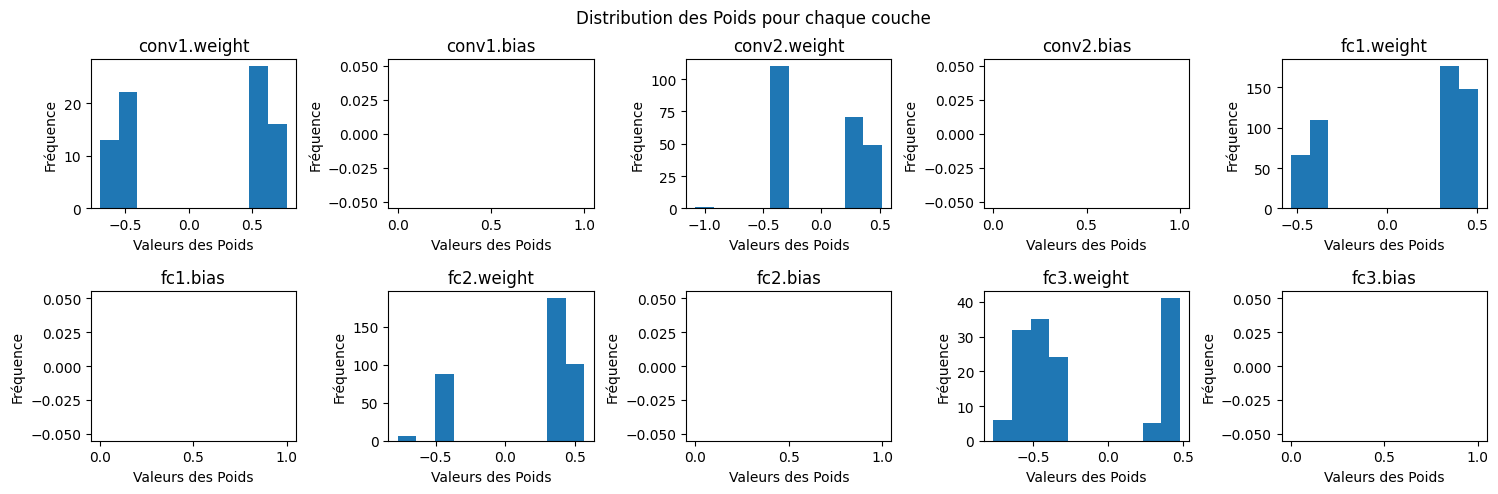

In [57]:
  N_ROW = 2
  N_COL = 5
  layer_weights = net_pruned_quantized.named_parameters()
  fig, ax = plt.subplots(N_ROW, N_COL, figsize=(15, 5))

  for i in range(N_ROW):
      for j in range(N_COL):
          layer_name, weight = next(layer_weights)
          weight = weight.clone().to_sparse().values().cpu().detach().numpy().flatten()
          ax[i][j].hist(weight[weight != 0])
          ax[i][j].set_title(f'{layer_name}')
          ax[i][j].set_xlabel('Valeurs des Poids')
          ax[i][j].set_ylabel('Fréquence')
  fig.suptitle('Distribution des Poids pour chaque couche')
  plt.tight_layout()
  plt.subplots_adjust(top=0.88)
  plt.show()

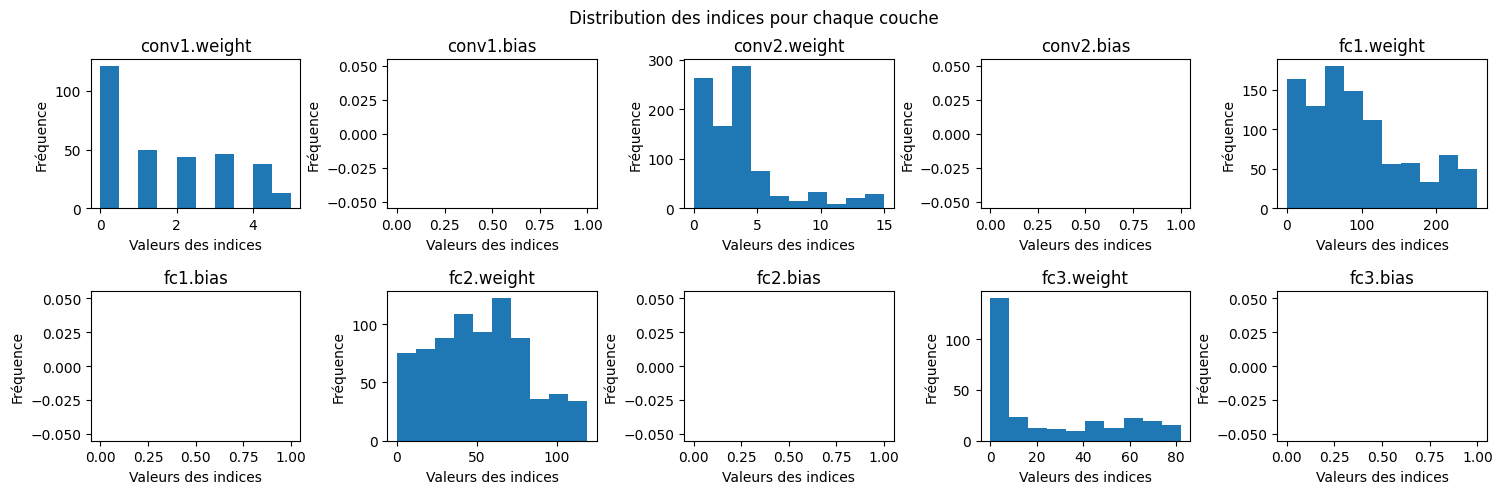

In [58]:
  N_ROW = 2
  N_COL = 5
  layer_weights = net_pruned_quantized.named_parameters()
  fig, ax = plt.subplots(N_ROW, N_COL, figsize=(15, 5))

  for i in range(N_ROW):
      for j in range(N_COL):
          layer_name, weight = next(layer_weights)
          weight = weight.clone().to_sparse().indices().cpu().detach().numpy().flatten()
          ax[i][j].hist(weight)
          ax[i][j].set_title(f'{layer_name}')
          ax[i][j].set_xlabel('Valeurs des indices')
          ax[i][j].set_ylabel('Fréquence')
  fig.suptitle('Distribution des indices pour chaque couche')
  plt.tight_layout()
  plt.subplots_adjust(top=0.88)
  plt.show()

On observe de nombreuses valeurs partagées sur les indices et valeurs, ainsi l'encodage Huffman sera efficace. \

Ci-dessous nous appliquons l'encodage Huffman et sauvegardons les codes et arbres. Puis nous rechargeons les poids dans un modèle vide.

In [18]:
# Création d'une instance de LeNet avec des poids aléatoires

net_empty = LeNet().to(device)
test(net_empty, testloader)
#compute_sparsity(net_empty)

# Création des codes et arbres huffman
net_pruned_quantized_huffman = deepcopy(net_pruned_quantized)
codes, trees = huffman_coding_for_pytorch_model(net_pruned_quantized_huffman)

# Sauvegarde des codes et arbres huffman
save_huffman_tree_to_file(trees=trees, prefix='LeNetTPQH')
save_encoded_weights_sparse(model=net_pruned_quantized_huffman, huffman_codes=codes, prefix='LeNetTPQH')

# Rechargement des poids sauvegardés dans un model
trees_saved = load_trees(model=net_empty, prefix='LeNetTPQH')
load_huffman_encoded_weights_sparse(prefix='LeNetTPQH', model=net_empty, trees=trees_saved)
test(net_empty, testloader)
# compute_sparsity(net_empty)

Sur 10000 images de test: Précision = 13.020%, Perte moyenne par image = 2.303
conv1.weight
value_codes taille = 4
index_codes taille = 6
encoded_values_bits taille = 156
encoded_indices_bits taille = 745
conv1.bias
value_codes taille = 0
index_codes taille = 0
encoded_values_bits taille = 0
encoded_indices_bits taille = 0
conv2.weight
value_codes taille = 4
index_codes taille = 16
encoded_values_bits taille = 402
encoded_indices_bits taille = 3039
conv2.bias
value_codes taille = 0
index_codes taille = 0
encoded_values_bits taille = 0
encoded_indices_bits taille = 0
fc1.weight
value_codes taille = 4
index_codes taille = 219
encoded_values_bits taille = 997
encoded_indices_bits taille = 7377
fc1.bias
value_codes taille = 0
index_codes taille = 0
encoded_values_bits taille = 0
encoded_indices_bits taille = 0
fc2.weight
value_codes taille = 4
index_codes taille = 104
encoded_values_bits taille = 671
encoded_indices_bits taille = 4958
fc2.bias
value_codes taille = 0
index_codes taille = 0


(97.97, 0.05980052667324043)

In [ ]:
# # Supprimer le modèle encodé
# directory = 'encodings'
# delete_directory(directory)

Le répertoire encodings et son contenu ont été supprimés avec succès.


### 4.2 Bilan sur l'encodage Huffman

Nous avons encodé le réseau selon le protocole proposé par Huffman tirant parti de la grande sparcité des tenseurs de poids ainsi que des nombreux poids partagés.

**🖊🧑 Exercice:** Déterminer la taille nécessaire pour stocker les poids du modèle après élagage non structuré global à 97% puis partage de poids et encodage Huffman avec:
- 'conv1': 4 poids différents non nuls
- 'conv2': 4 poids différents non nuls
- 'fc1': 4 poids différents non nuls
- 'fc2': 4 poids différents non nuls
- 'fc3': 8 poids différents non nuls

On comptera les tenseurs de biais comme nuls car tous les poids sont à 0.

On rappel le nombre de poids par couches:
- 'conv1': 78 poids non nuls sur 150
- 'conv2': 231 poids non nuls sur  2400
- 'fc1': 499 poids non nuls sur 30720
- 'fc2': 382 poids non nuls sur 10080
- 'fc3': 143 poids non nuls sur  840

On calculera la taille total des arbres et des codes.
On se rappelera que chaque tenseur de poids est un tenseur troch sparse et possède un tenseur d'indice et un tenseur de valeurs.


**☝  Solution:**  <details class="alert alert-danger">
    <summary markdown="span"><b>Prêt à voir la solution </b></summary>

On calcule d'abord la **taille des arbres**:

Sérialisation de l'Arbre : Pour sérialiser un arbre Huffman, nous utilisons les règles suivantes :

Un bit 1 pour marquer un nœud feuille, suivi de 32 bits (4 octets) pour représenter la valeur du poids en tant que nombre flottant.
Un bit 0 pour marquer un nœud interne. Les nœuds internes ne stockent pas de valeur de poids directement, ils servent à naviguer dans l'arbre.
Taille de Sérialisation pour Chaque Poids Différent Non Nul :

Pour chaque poids différent non nul (nœud feuille), nous avons donc 1 bit pour le marqueur de feuille, et 32 bits pour la valeur du poids.
La taille totale pour sérialiser un nœud feuille est donc de 33 bits.

Ainsi pour les tenseurs de poids:
- 'conv1': $33*4 = 132$ bits
- 'conv2': $33*4 = 132$ bits
- 'fc1': $33*4 = 132$ bits
- 'fc2': $33*4 = 132$ bits
- 'fc3': $33*8 = 264$ bits

$Total.arbres.poids = 792$ bits

Pour les tenseurs d'indices:
- 'conv1': $33*6 = 198$ bits
- 'conv2': $33*16 = 528$ bits
- 'fc1': $33*219 = 7227$ bits
- 'fc2': $33*104 = 3432$ bits
- 'fc3': $33*67 = 2211$ bits

$Total.arbres.indices = 13596$ bits

Pour la **taille des code Huffman**, il faut connaitre la fréquence de chacun des symboles par tenseur pour en deduire la taille total en nombre de bits. Nous affichons simplement la longueur des chaines encodés pour chaque couche.

conv1.weight
- encoded_values_bits taille = 156 bits
- encoded_indices_bits taille = 745 bits

conv1.bias
- encoded_values_bits taille = 0 bits
- encoded_indices_bits taille = 0 bits

conv2.weight
- encoded_values_bits taille = 402 bits
- encoded_indices_bits taille = 3039 bits

conv2.bias
- encoded_values_bits taille = 0 bits
- encoded_indices_bits taille = 0 bits

fc1.weight
- encoded_values_bits taille = 997 bits
- encoded_indices_bits taille = 7377 bits

fc1.bias
- encoded_values_bits taille = 0 bits
- encoded_indices_bits taille = 0 bits

fc2.weight
- encoded_values_bits taille = 671 bits
- encoded_indices_bits taille = 4958 bits

fc2.bias
- encoded_values_bits taille = 0 bits
- encoded_indices_bits taille = 0 bits

fc3.weight
- encoded_values_bits taille = 388 bits
- encoded_indices_bits taille = 1551 bits

$Total.codes = 20284$ bits

---

$Total = 34672$ bits

**Soit 4334 octets.**


**`Taille, Précision et Perte : modèle initiale entraîné (après compression)`**

**- Taille initale** = 1 421 632 bits

**- Précision - entrainement initale** = 99.352% \
**- Précision - test initale** = 98.960%

**- Perte - entrainement initale** = 0.020 \
**- Perte - test initale** = 0.033

---

**- Taille** = 34 672 bits

**- Précision - entrainement initale** = 98.415% \
**- Précision - test initale** = 97.970%

**- Perte - entrainement initale** = 0.049 \
**- Perte - test initale** = 0.060

---

**Taux de compression final** = $*41$

Note: le taux de compression est moins impressionnat que dans les schémas car nous prenons en compte l'espace nécessaire pour stocker les indices contrairement à l'article.


## Bilan

Dans ce notebook, nous avons exploré l'impact combiné de trois techniques de compression avancées sur un modèle de réseau de neurones profonds : l'élagage non structuré global, le partage de poids, et l'encodage Huffman. En élaguant 97% des poids non nuls, nous avons significativement réduit la complexité du modèle tout en maintenant une performance acceptable. Le partage de poids a ensuite permis une réduction supplémentaire de la redondance des données, optimisant davantage l'espace nécessaire pour stocker les poids du modèle. L'application de l'encodage Huffman a finalement permis de compresser ces poids partagés, résultant en une taille totale de modèle d'environ 3 434 octets (ou 3.4 Ko), démontrant une réduction substantielle par rapport à la taille originale.

Cette approche de compression montre qu'il est possible de réduire considérablement la taille d'un modèle de réseau de neurones profonds sans sacrifier de manière significative ses performances, ce qui est crucial pour le déploiement de modèles d'IA dans des environnements à ressources limitées, tels que les appareils mobiles et embarqués. Les résultats soulignent l'importance de combiner différentes techniques de compression pour atteindre des niveaux de compacité élevés, ouvrant des perspectives intéressantes pour la recherche future dans le domaine de l'optimisation des modèles d'IA.

En conclusion, notre étude confirme l'efficacité de l'élagage, du partage de poids, et de l'encodage Huffman comme stratégies complémentaires pour la compression des réseaux de neurones, offrant une voie viable vers la minimisation de l'empreinte mémoire des modèles d'intelligence artificielle sans compromettre leur capacité de prédiction.

### Références

Deep Compression: Compressing Deep Neural Networks with Pruning, Trained Quantization and Huffman Coding
Song Han, Huizi Mao, William J. Dally